In [193]:
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
import lightgbm as lgb
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from prettytable import PrettyTable

In [194]:
%%time
train_id=pd.read_csv("/Users/harikolguri/Desktop/ML/UOH-Project/Fraud_Detection/FM/fmenv/Data/train_identity.csv")
test_id=pd.read_csv("/Users/harikolguri/Desktop/ML/UOH-Project/Fraud_Detection/FM/fmenv/Data/test_identity.csv")
train_trans=pd.read_csv("/Users/harikolguri/Desktop/ML/UOH-Project/Fraud_Detection/FM/fmenv/Data/train_transaction.csv")
test_trans=pd.read_csv("/Users/harikolguri/Desktop/ML/UOH-Project/Fraud_Detection/FM/fmenv/Data/test_transaction.csv")

CPU times: user 18 s, sys: 3.45 s, total: 21.5 s
Wall time: 23.1 s


## Check the information for transaction file 

In [195]:
train_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


## Check the information for identity file

In [196]:
train_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

## Sample transaction data

In [197]:
train_trans.head()

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ... V330  V331  V332  V333  V334 V335  \
0    NaN  150.0    discover  142.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
1  404.0  150.0  mastercard  102.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
2  490.0  150.0        visa  166.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
3  567.0  150.0  mastercard  117.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
4  514.0  150.0  mastercard  102.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   

  V336  V337  V338  V339  
0  NaN   NaN   NaN   NaN  
1  NaN   NaN   NaN   NaN  
2  NaN   NaN   NaN   NaN  
3  NaN   NaN   NaN   NaN  
4  0.0   0.0   0.0   0.0  

[5 rows x 394 columns]

## Sample Identity  data

In [198]:
train_id.head()

TransactionID  id_01     id_02  id_03  id_04  id_05  id_06  id_07  id_08  \
0        2987004    0.0   70787.0    NaN    NaN    NaN    NaN    NaN    NaN   
1        2987008   -5.0   98945.0    NaN    NaN    0.0   -5.0    NaN    NaN   
2        2987010   -5.0  191631.0    0.0    0.0    0.0    0.0    NaN    NaN   
3        2987011   -5.0  221832.0    NaN    NaN    0.0   -6.0    NaN    NaN   
4        2987016    0.0    7460.0    0.0    0.0    1.0    0.0    NaN    NaN   

   id_09  ...                id_31  id_32      id_33           id_34  id_35  \
0    NaN  ...  samsung browser 6.2   32.0  2220x1080  match_status:2      T   
1    NaN  ...   mobile safari 11.0   32.0   1334x750  match_status:1      T   
2    0.0  ...          chrome 62.0    NaN        NaN             NaN      F   
3    NaN  ...          chrome 62.0    NaN        NaN             NaN      F   
4    0.0  ...          chrome 62.0   24.0   1280x800  match_status:2      T   

  id_36 id_37  id_38  DeviceType                     DeviceInfo  
0     F     T      T      mobile  SAMSUNG SM-G892A Build/NRD90M  
1     F     F      T      mobile                     iOS Device  
2     F     T      T     desktop                        Windows  
3     F     T      T     desktop                            NaN  
4     F     T      T     desktop                          MacOS  

[5 rows x 41 columns]

## Check the max and min value of all the numeric columns for transaction file 

In [199]:
 for col in train_trans.columns:
        if (train_trans[col].dtype =='int64' or train_trans[col].dtype=='float64'):
            print('{} MAX value   is: {} and min value is : {}'.format(col,train_trans[col].max(),train_trans[col].min()))
        
 

TransactionID MAX value   is: 3577539 and min value is : 2987000
isFraud MAX value   is: 1 and min value is : 0
TransactionDT MAX value   is: 15811131 and min value is : 86400
TransactionAmt MAX value   is: 31937.391 and min value is : 0.251
card1 MAX value   is: 18396 and min value is : 1000
card2 MAX value   is: 600.0 and min value is : 100.0
card3 MAX value   is: 231.0 and min value is : 100.0
card5 MAX value   is: 237.0 and min value is : 100.0
addr1 MAX value   is: 540.0 and min value is : 100.0
addr2 MAX value   is: 102.0 and min value is : 10.0
dist1 MAX value   is: 10286.0 and min value is : 0.0
dist2 MAX value   is: 11623.0 and min value is : 0.0
C1 MAX value   is: 4685.0 and min value is : 0.0
C2 MAX value   is: 5691.0 and min value is : 0.0
C3 MAX value   is: 26.0 and min value is : 0.0
C4 MAX value   is: 2253.0 and min value is : 0.0
C5 MAX value   is: 349.0 and min value is : 0.0
C6 MAX value   is: 2253.0 and min value is : 0.0
C7 MAX value   is: 2255.0 and min value is : 

## Check the max and min value of all the numeric columns of Identity  file 

In [200]:
 for col in train_id.columns:
        if (train_id[col].dtype =='int64' or train_id[col].dtype=='float64'):
            print('{} MAX value   is: {} and min value is : {}'.format(col,train_id[col].max(),train_id[col].min()))
        
 

TransactionID MAX value   is: 3577534 and min value is : 2987004
id_01 MAX value   is: 0.0 and min value is : -100.0
id_02 MAX value   is: 999595.0 and min value is : 1.0
id_03 MAX value   is: 10.0 and min value is : -13.0
id_04 MAX value   is: 0.0 and min value is : -28.0
id_05 MAX value   is: 52.0 and min value is : -72.0
id_06 MAX value   is: 0.0 and min value is : -100.0
id_07 MAX value   is: 61.0 and min value is : -46.0
id_08 MAX value   is: 0.0 and min value is : -100.0
id_09 MAX value   is: 25.0 and min value is : -36.0
id_10 MAX value   is: 0.0 and min value is : -100.0
id_11 MAX value   is: 100.0 and min value is : 90.0
id_13 MAX value   is: 64.0 and min value is : 10.0
id_14 MAX value   is: 720.0 and min value is : -660.0
id_17 MAX value   is: 229.0 and min value is : 100.0
id_18 MAX value   is: 29.0 and min value is : 10.0
id_19 MAX value   is: 671.0 and min value is : 100.0
id_20 MAX value   is: 661.0 and min value is : 100.0
id_21 MAX value   is: 854.0 and min value is : 

## Check the total number of data points avilable for non-fraud and Fradulent transactions

In [201]:

print("% of Non-Fradulent transactions: ",(train_trans['isFraud'].value_counts()[0])/(train_trans['isFraud'].value_counts()[0]+train_trans['isFraud'].value_counts()[1])*100)
print("% of Fradulent transactions: ",(train_trans['isFraud'].value_counts()[1])/(train_trans['isFraud'].value_counts()[0]+train_trans['isFraud'].value_counts()[1])*100)


% of Non-Fradulent transactions:  96.50099908558268
% of Fradulent transactions:  3.4990009144173126


## Observation : We see the data points for non-fradulent transactions are very high compared to Fradulent transactions. The data is highly Imbalanced. 

### Check min , max, mean , percentiles for transaction data 

In [202]:
train_trans.describe()

TransactionID        isFraud  TransactionDT  TransactionAmt  \
count   5.905400e+05  590540.000000   5.905400e+05   590540.000000   
mean    3.282270e+06       0.034990   7.372311e+06      135.027176   
std     1.704744e+05       0.183755   4.617224e+06      239.162522   
min     2.987000e+06       0.000000   8.640000e+04        0.251000   
25%     3.134635e+06       0.000000   3.027058e+06       43.321000   
50%     3.282270e+06       0.000000   7.306528e+06       68.769000   
75%     3.429904e+06       0.000000   1.124662e+07      125.000000   
max     3.577539e+06       1.000000   1.581113e+07    31937.391000   

               card1          card2          card3          card5  \
count  590540.000000  581607.000000  588975.000000  586281.000000   
mean     9898.734658     362.555488     153.194925     199.278897   
std      4901.170153     157.793246      11.336444      41.244453   
min      1000.000000     100.000000     100.000000     100.000000   
25%      6019.000000     214.000000     150.000000     166.000000   
50%      9678.000000     361.000000     150.000000     226.000000   
75%     14184.000000     512.000000     150.000000     226.000000   
max     18396.000000     600.000000     231.000000     237.000000   

               addr1          addr2  ...          V330           V331  \
count  524834.000000  524834.000000  ...  82351.000000   82351.000000   
mean      290.733794      86.800630  ...      0.775874     721.741883   
std       101.741072       2.690623  ...      4.727971    6217.223583   
min       100.000000      10.000000  ...      0.000000       0.000000   
25%       204.000000      87.000000  ...      0.000000       0.000000   
50%       299.000000      87.000000  ...      0.000000       0.000000   
75%       330.000000      87.000000  ...      0.000000       0.000000   
max       540.000000     102.000000  ...     55.000000  160000.000000   

                V332           V333          V334         V335          V336  \
count   82351.000000   82351.000000  82351.000000  82351.00000  82351.000000   
mean     1375.783644    1014.622782      9.807015     59.16455     28.530903   
std     11169.275702    7955.735482    243.861391    387.62948    274.576920   
min         0.000000       0.000000      0.000000      0.00000      0.000000   
25%         0.000000       0.000000      0.000000      0.00000      0.000000   
50%         0.000000       0.000000      0.000000      0.00000      0.000000   
75%        25.000000       0.000000      0.000000      0.00000      0.000000   
max    160000.000000  160000.000000  55125.000000  55125.00000  55125.000000   

                V337           V338           V339  
count   82351.000000   82351.000000   82351.000000  
mean       55.352422     151.160542     100.700882  
std       668.486833    1095.034387     814.946722  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000  
max    104060.000000  104060.000000  104060.000000  

[8 rows x 380 columns]

### Check min , max, mean , percentiles for Fradulent transaction only

In [203]:
train_trans[train_trans['isFraud']==1].describe()

TransactionID  isFraud  TransactionDT  TransactionAmt         card1  \
count   2.066300e+04  20663.0   2.066300e+04    20663.000000  20663.000000   
mean    3.294952e+06      1.0   7.690033e+06      149.244779   9547.654164   
std     1.620403e+05      0.0   4.416551e+06      232.212163   4762.051380   
min     2.987203e+06      1.0   8.976000e+04        0.292000   1015.000000   
25%     3.167366e+06      1.0   3.965858e+06       35.044000   5732.500000   
50%     3.291934e+06      1.0   7.575230e+06       75.000000   9633.000000   
75%     3.428646e+06      1.0   1.121743e+07      161.000000  13623.000000   
max     3.577526e+06      1.0   1.581088e+07     5191.000000  18375.000000   

              card2         card3         card5         addr1         addr2  \
count  20240.000000  20624.000000  20453.000000  12922.000000  12922.000000   
mean     365.370850    162.368648    191.994328    294.317134     86.286024   
std      159.623511     17.495775     45.779886    103.584955      4.936238   
min      100.000000    100.000000    100.000000    110.000000     10.000000   
25%      204.000000    150.000000    138.000000    204.000000     87.000000   
50%      375.000000    150.000000    224.000000    299.000000     87.000000   
75%      514.000000    185.000000    226.000000    330.000000     87.000000   
max      600.000000    231.000000    237.000000    536.000000     96.000000   

       ...         V330         V331         V332         V333         V334  \
count  ...  3686.000000  3686.000000  3686.000000  3686.000000  3686.000000   
mean   ...     0.313619    90.384699   164.859468   127.633749     9.299240   
std    ...     0.960475   227.643019   436.287131   339.856944    51.502023   
min    ...     0.000000     0.000000     0.000000     0.000000     0.000000   
25%    ...     0.000000     0.000000     0.000000     0.000000     0.000000   
50%    ...     0.000000     0.000000     0.000000     0.000000     0.000000   
75%    ...     0.000000    75.000000   150.000000   100.000000     0.000000   
max    ...    13.000000  2600.000000  4700.000000  4285.000000   635.000000   

              V335         V336         V337         V338         V339  
count  3686.000000  3686.000000  3686.000000  3686.000000  3686.000000  
mean     49.394466    25.483993    37.742268    53.242268    45.496473  
std     201.848261   117.938993   142.505208   190.250383   175.966280  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max    2430.000000  1605.000000  2200.000000  2400.000000  2400.000000  

[8 rows x 380 columns]

### Check for Null Values 

In [204]:
train_trn_null_counts=train_trans.isnull().sum()


### Top 20 Columns with missing Value Counts 

In [205]:
train_trn_null_counts.nlargest(20)

dist2    552913
D7       551623
D13      528588
D14      528353
D12      525823
D6       517353
D8       515614
D9       515614
V138     508595
V139     508595
V140     508595
V141     508595
V142     508595
V146     508595
V147     508595
V148     508595
V149     508595
V153     508595
V154     508595
V155     508595
dtype: int64

In [206]:
train_trans[0:3][['TransactionDT','isFraud','TransactionAmt']]

TransactionDT  isFraud  TransactionAmt
0          86400        0            68.5
1          86401        0            29.0
2          86469        0            59.0

### we see TransactionDT is some time delta feature given in seconds. If we divide it by minutest*seconds*hours we can get day out of it 

In [207]:
train_trans['TransactionDT']/(24*60*60)

0           1.000000
1           1.000012
2           1.000799
3           1.001146
4           1.001227
             ...    
590535    182.998229
590536    182.998252
590537    182.998600
590538    182.998704
590539    182.999201
Name: TransactionDT, Length: 590540, dtype: float64

In [208]:
print("Transaction max day:",15811131/(24*60*60))
print("Transaction min day:",86400/(24*60*60))

Transaction max day: 182.99920138888888
Transaction min day: 1.0


### Observation: We see Transaction Max day is around 183 days and minimum day is 1 day.

## Merge Train and Test-  Transaction and Id Data sets

In [209]:
train=pd.merge(train_trans,train_id,how='left',on='TransactionID')

In [210]:
train.shape

(590540, 434)

In [211]:
train.head()

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ...                id_31  id_32  \
0    NaN  150.0    discover  142.0  ...  samsung browser 6.2   32.0   
1  404.0  150.0  mastercard  102.0  ...   mobile safari 11.0   32.0   
2  490.0  150.0        visa  166.0  ...          chrome 62.0    NaN   
3  567.0  150.0  mastercard  117.0  ...          chrome 62.0    NaN   
4  514.0  150.0  mastercard  102.0  ...          chrome 62.0   24.0   

       id_33           id_34  id_35 id_36 id_37  id_38  DeviceType  \
0  2220x1080  match_status:2      T     F     T      T      mobile   
1   1334x750  match_status:1      T     F     F      T      mobile   
2        NaN             NaN      F     F     T      T     desktop   
3        NaN             NaN      F     F     T      T     desktop   
4   1280x800  match_status:2      T     F     T      T     desktop   

                      DeviceInfo  
0  SAMSUNG SM-G892A Build/NRD90M  
1                     iOS Device  
2                        Windows  
3                            NaN  
4                          MacOS  

[5 rows x 434 columns]

In [212]:
test=pd.merge(test_trans,test_id,how='left',on='TransactionID')
print(test.shape)

(506691, 433)


In [213]:
test.head()

TransactionID  TransactionDT  TransactionAmt ProductCD  card1  card2  \
0        3663549       18403224           31.95         W  10409  111.0   
1        3663550       18403263           49.00         W   4272  111.0   
2        3663551       18403310          171.00         W   4476  574.0   
3        3663552       18403310          284.95         W  10989  360.0   
4        3663553       18403317           67.95         W  18018  452.0   

   card3       card4  card5  card6  ...                    id-31  id-32  \
0  150.0        visa  226.0  debit  ...  chrome 67.0 for android    NaN   
1  150.0        visa  226.0  debit  ...  chrome 67.0 for android   24.0   
2  150.0        visa  226.0  debit  ...       ie 11.0 for tablet    NaN   
3  150.0        visa  166.0  debit  ...  chrome 67.0 for android    NaN   
4  150.0  mastercard  117.0  debit  ...  chrome 67.0 for android    NaN   

      id-33           id-34 id-35 id-36  id-37  id-38  DeviceType  \
0       NaN             NaN     F     F      T      F      mobile   
1  1280x720  match_status:2     T     F      T      T      mobile   
2       NaN             NaN     F     T      T      F     desktop   
3       NaN             NaN     F     F      T      F      mobile   
4       NaN             NaN     F     F      T      F      mobile   

                    DeviceInfo  
0  MYA-L13 Build/HUAWEIMYA-L13  
1         LGLS676 Build/MXB48T  
2                  Trident/7.0  
3  MYA-L13 Build/HUAWEIMYA-L13  
4         SM-G9650 Build/R16NW  

[5 rows x 433 columns]

### Analysis on Target Variable isFraud

/Users/harikolguri/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


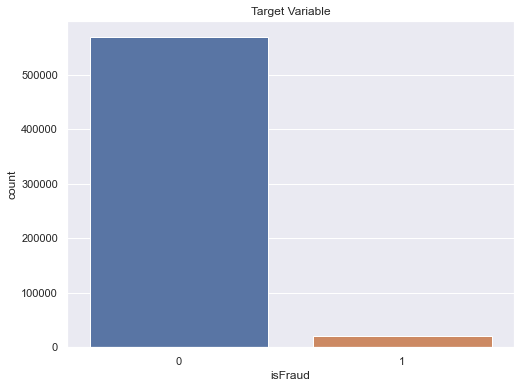

In [214]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(8,6))
sns.countplot(train['isFraud'])
axes.title.set_text('Target Variable')
plt.show()

In [215]:

print("% of Non-Fradulent transactions: ",(train['isFraud'].value_counts()[0])/(train['isFraud'].value_counts()[0]+train['isFraud'].value_counts()[1])*100)
print("% of Fradulent transactions: ",(train['isFraud'].value_counts()[1])/(train['isFraud'].value_counts()[0]+train['isFraud'].value_counts()[1])*100)


% of Non-Fradulent transactions:  96.50099908558268
% of Fradulent transactions:  3.4990009144173126


### Observation: We see more than 96.5% of the given transactions are non fradulent and only  3.5% are fradulent transactions. We see the data set is highly imbalanced 

### Compute the % of Missing values for each column

In [216]:
print("Total Missing Cells in Train Data:",train.isnull().sum().sum())

Total Missing Cells in Train Data: 115523073


In [217]:
train_null_percent=(train.isnull().sum()/train.shape[0])*100

In [218]:
train_null_percent=train_null_percent.reset_index()
train_null_percent.columns=['col Name','missing_percent']


In [219]:
train_null_percent[train_null_percent['missing_percent']>90]

col Name  missing_percent
14     dist2        93.628374
37        D7        93.409930
400    id_07        99.127070
401    id_08        99.127070
411    id_18        92.360721
414    id_21        99.126393
415    id_22        99.124699
416    id_23        99.124699
417    id_24        99.196159
418    id_25        99.130965
419    id_26        99.125715
420    id_27        99.124699

### Observation: There are 12 columns with missing values over 90%

### Replace all NAN values with 0 and other values with 1 for 12 columns with 90% of missing values

In [220]:
#Replace all NAN values with 0 and other values with 1 . The missing values can mean somthing realated 
#to fraud /non-fraud transactions.
#x!=x works for all types of columns including float and Object too . 
# lambda x: 0 if np.isnan(x) else 1 works for only floats (id_23','id_27' are object type columns)


cols=['dist2','D7','id_07','id_08','id_18','id_21','id_22','id_23','id_24','id_25','id_26','id_27']
for col in cols:
    train[col+'_c']=train[col].apply(lambda x: 0 if x!=x else 1)


In [221]:
train_nan_corr=train[['dist2','D7','id_07','id_08','id_18','id_21','id_22','id_23','id_24','id_25','id_26','id_27','isFraud']].corr()
train_nan_corr

dist2        D7     id_07     id_08     id_18     id_21     id_22  \
dist2    1.000000 -0.022431  0.041284 -0.011469 -0.008298 -0.032597  0.088670   
D7      -0.022431  1.000000  0.025541 -0.001714  0.025940 -0.022202  0.015034   
id_07    0.041284  0.025541  1.000000 -0.094086 -0.161544 -0.188250 -0.277448   
id_08   -0.011469 -0.001714 -0.094086  1.000000 -0.061456  0.085533  0.143301   
id_18   -0.008298  0.025940 -0.161544 -0.061456  1.000000  0.202953  0.130109   
id_21   -0.032597 -0.022202 -0.188250  0.085533  0.202953  1.000000  0.070591   
id_22    0.088670  0.015034 -0.277448  0.143301  0.130109  0.070591  1.000000   
id_24   -0.003565 -0.033526 -0.070752 -0.011849  0.014321  0.220933  0.014067   
id_25    0.073840  0.013257  0.037649 -0.003628  0.108161 -0.147694  0.182643   
id_26    0.010498 -0.045363 -0.131638  0.037212 -0.048799  0.053721  0.281324   
isFraud -0.019054 -0.127199 -0.010620 -0.004329 -0.009040  0.038820  0.020338   

            id_24     id_25     id_26   isFraud  
dist2   -0.003565  0.073840  0.010498 -0.019054  
D7      -0.033526  0.013257 -0.045363 -0.127199  
id_07   -0.070752  0.037649 -0.131638 -0.010620  
id_08   -0.011849 -0.003628  0.037212 -0.004329  
id_18    0.014321  0.108161 -0.048799 -0.009040  
id_21    0.220933 -0.147694  0.053721  0.038820  
id_22    0.014067  0.182643  0.281324  0.020338  
id_24    1.000000 -0.030902  0.086002  0.009990  
id_25   -0.030902  1.000000  0.011508 -0.000063  
id_26    0.086002  0.011508  1.000000  0.012422  
isFraud  0.009990 -0.000063  0.012422  1.000000

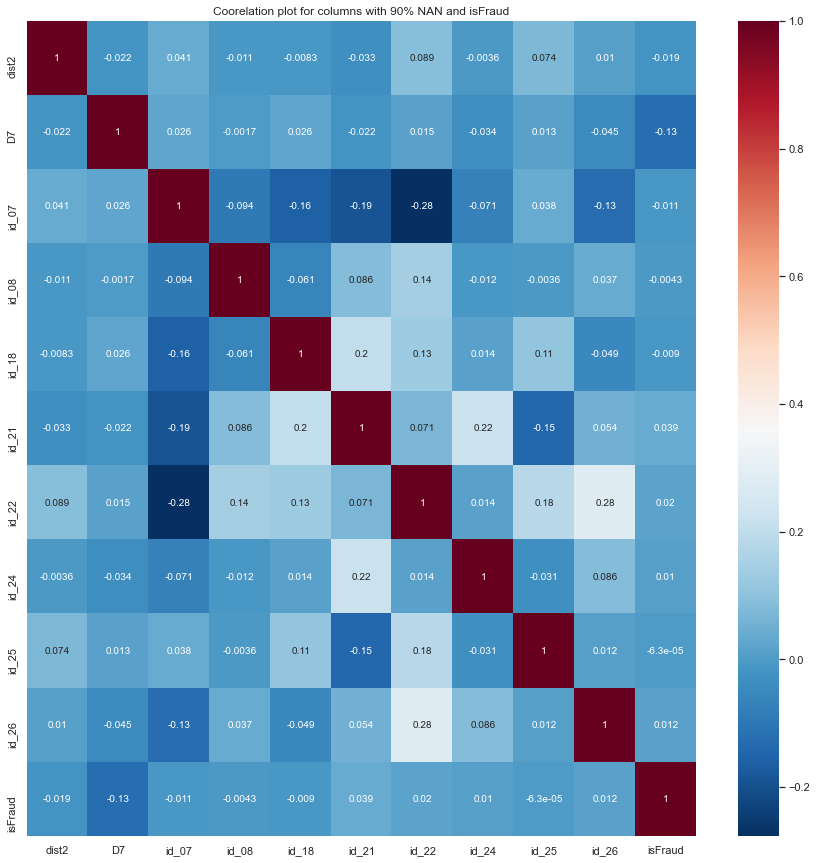

In [222]:
fig,axes = plt.subplots(1,1,figsize=(15,15))
sns.heatmap(train_nan_corr,annot=True,cmap='RdBu_r')
axes.title.set_text('Coorelation plot for columns with 90% NAN and isFraud')
plt.show()

### Observation: We see the columns with more than 90% missing values have less corelation to traget isFraud variable. Hence we can drop these columns as they dont provide much information related to fraud 

## Analyze Corelation of each column vs Target Column

In [223]:
train_corr=train.corr()[['isFraud']]

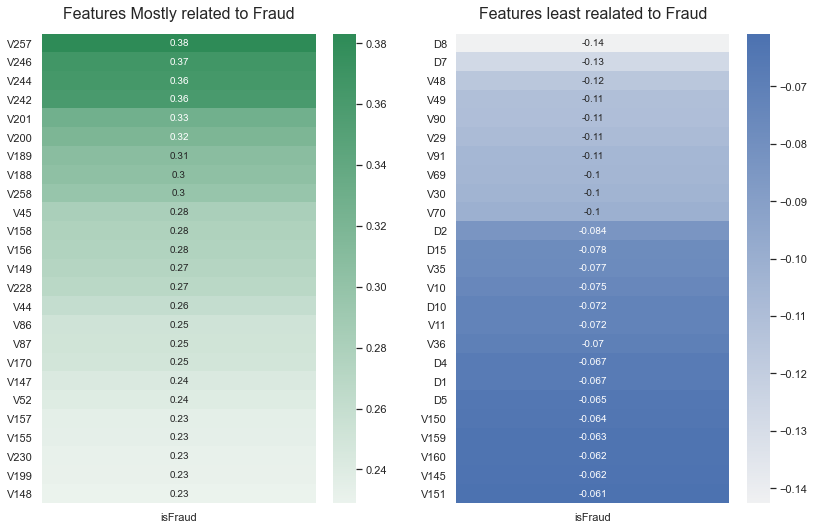

In [224]:

fig, axis = plt.subplots(1,2,figsize=(12, 8))
max_features = train_corr.loc[(train_corr['isFraud']>0) & (train_corr['isFraud']!=1)].sort_values(by='isFraud', ascending=False).head(25)
heatmap_max_featurs = sns.heatmap(max_features, vmin=max_features.min(), vmax=max_features.max(), annot=True, cmap=sns.light_palette("seagreen", as_cmap=True),ax = axis[0])
heatmap_max_featurs.set_title('Features Mostly related to Fraud', fontdict={'fontsize':16}, pad=15);

min_features = train_corr.loc[train_corr['isFraud']<0].sort_values(by='isFraud', ascending=True).head(25)
heatmap_min_features = sns.heatmap(min_features, vmin=min_features.max(), vmax=min_features.min(), annot=True, cmap=sns.color_palette("light:b", as_cmap=True),ax = axis[1])
heatmap_min_features.set_title('Features least realated to Fraud', fontdict={'fontsize':16}, pad=15);
fig.tight_layout(pad=3.0)

### Observation: Based on the corelation we can keep/give more importance to features that are highly corelated to isFraud column

## Analyse Transaction Time Column
We see the TransactionDT field is a timedelta from a certain refrence point. Upon analysis we can see this is given in seconds.

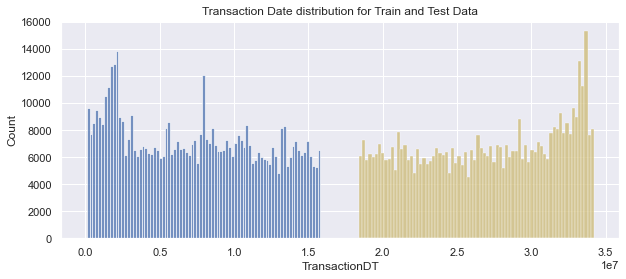

In [225]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(10,4))
sns.histplot(train['TransactionDT'])
sns.histplot(test['TransactionDT'],color='y')
axes.title.set_text('Transaction Date distribution for Train and Test Data')
plt.show()

### Observation: We see the Transactions from Test data set took place after all the transactions form Train data set. Also there is a gap between transactions form Train and Test data sets

In [226]:
# Below we can see when we divide the Transaction Date by 24 hrs * 60 minutes * 60 seconds we can get a particular day 

train['TransactionDT'][10]/(24*60*60)

#Observation: we can compute the day information from TransactionDT column and do further analysis on how to utilize it



1.0017245370370371

In [227]:
(train['TransactionDT']//(60*60))%24

0          0
1          0
2          0
3          0
4          0
          ..
590535    23
590536    23
590537    23
590538    23
590539    23
Name: TransactionDT, Length: 590540, dtype: int64

In [228]:
#Create a new column which will hold the hour representation of TransactionDT field
train['hour'] = (train['TransactionDT']//(60*60))%24

In [229]:
#compute the mean after grouping transactions by hour it took place. ie For each hour divide total fraud trans by 
#by fraud + non-fraud for each hour
train[['isFraud','hour']].groupby(by=['hour']).mean()

isFraud
hour          
0     0.031380
1     0.031314
2     0.037483
3     0.038314
4     0.051890
5     0.070302
6     0.077743
7     0.106102
8     0.093014
9     0.089956
10    0.053212
11    0.038816
12    0.030439
13    0.022889
14    0.024216
15    0.025399
16    0.029511
17    0.031530
18    0.035231
19    0.034738
20    0.034273
21    0.034005
22    0.032694
23    0.036997

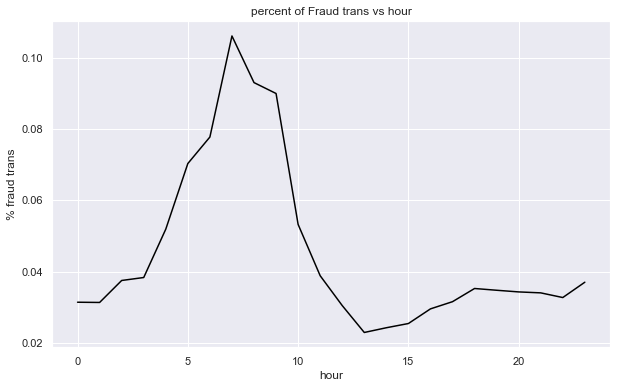

In [230]:
train_fraud_mean_per_hr = train[['isFraud','hour']].groupby(by=['hour']).mean().reset_index() \
            .rename(columns={'isFraud':'% fraud trans'})

fig, axes = plt.subplots(figsize=(10,6))
axes = sns.lineplot(x=train_fraud_mean_per_hr['hour'],y=train_fraud_mean_per_hr['% fraud trans'],color='black')
axes.set_title('percent of Fraud trans vs hour')

plt.show()



### Observation: We see the Fradulent transaction are high in some portions of hours in a day. Fraud is high from hours 5 through 10. We also observe during hours 12-13 it is least

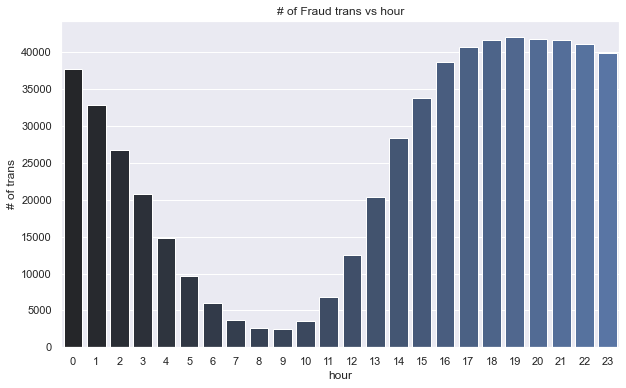

In [231]:
train_fraud_count_hr = train[['TransactionID','hour']].groupby(by=['hour']).count().reset_index() \
            .rename(columns={'TransactionID':'# of trans'})
fig, axes = plt.subplots(figsize=(10,6))
sns.barplot(x=train_fraud_count_hr['hour'],y=train_fraud_count_hr['# of trans'],palette="dark:b")
axes.set_title('# of Fraud trans vs hour')
plt.show()

### Observarion: We see the transanction totals are very low during certain hours of the day. From hours 6 through 11 it is very low . We can create 3 or 4 categorical variables based on the hours of day where fradulent transaction are verylow , medium, high 

### From above 2 plots we see when the Fraud is high , total transaction amount during those hours is very low.

In [232]:
#compute the total count of transactions per each hour it took place
train[['isFraud','hour']].groupby(by=['hour']).count()

isFraud
hour         
0       37795
1       32797
2       26732
3       20802
4       14839
5        9701
6        6007
7        3704
8        2591
9        2479
10       3627
11       6827
12      12451
13      20315
14      28328
15      33859
16      38698
17      40723
18      41639
19      42115
20      41782
21      41641
22      41139
23      39949

Text(0.5, 1.0, 'Transaction Date vs Transaction Amount')

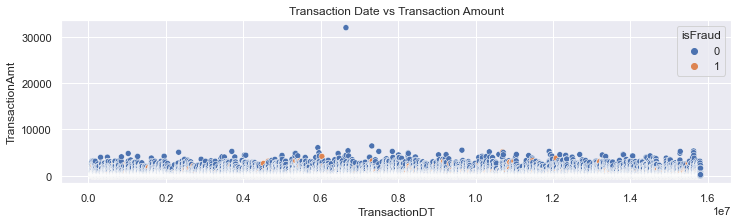

In [233]:
fig, axes = plt.subplots(figsize=(12,3))
sns.scatterplot(y=train['TransactionAmt'],x=train['TransactionDT'],hue=train['isFraud'])
axes.set_title("Transaction Date vs Transaction Amount")

### Observation: There are some outliers in Transaction amount which are around 30000 in training data. we can remove tehse outliers

In [234]:
train = train[train['TransactionAmt'] < 30000]
train.shape

(590538, 447)

## Check Distributions of Fradulent and non Fradulent transactions:

In [235]:
train_fraud=train[train['isFraud']==1]
train_not_fraud=train[train['isFraud']==0]

/Users/harikolguri/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/harikolguri/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


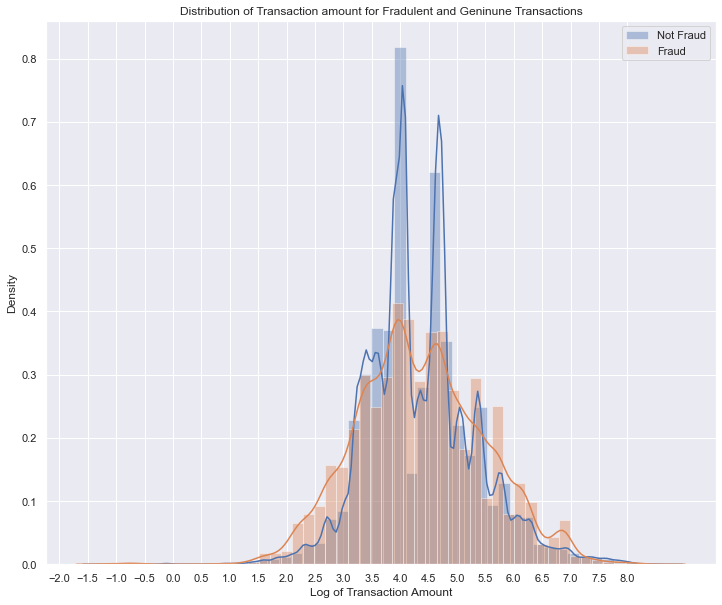

In [236]:
fig,axes = plt.subplots(figsize=(12,10))
sns.distplot(x=np.log(train_not_fraud['TransactionAmt']),label='Not Fraud')
sns.distplot(x=np.log(train_fraud['TransactionAmt']),label='Fraud')
axes.set_title("Distribution of Transaction amount for Fradulent and Geninune Transactions")
axes.set(xlabel='Log of Transaction Amount', ylabel='Density')
axes.legend()
plt.xticks([-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.show()

### Observation: We observe transactions with log amount of less than 3.0 and more than 5.0 have higher probability of being a fradulent transaction. If the amount lies between 3.0 and 5.0 there is high probability of being Legit transaction 

## Analysis on Product Codes

In [237]:
# Check to see if there are any null values in product cd column
train['ProductCD'].isnull().sum()

0

There are no null values in productCD column.

In [238]:
train['ProductCD'].value_counts()

W    439668
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64

Text(0.5, 1.0, 'Product Code distribution in Train Data')

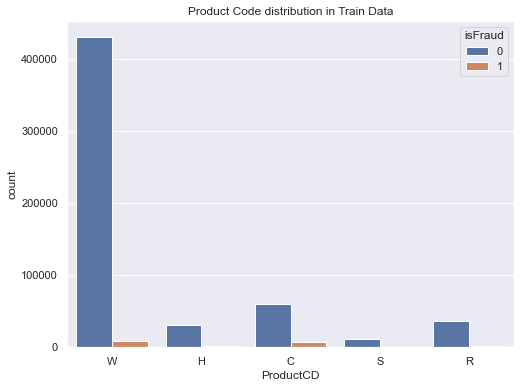

In [239]:
fig,axes=plt.subplots(figsize=(8,6))
sns.countplot(x=train['ProductCD'],hue=train['isFraud'])
axes.set_title("Product Code distribution in Train Data")

Observation: We see most of the transactions have productCD of W. Lets try to find distribution of Fraud for each ProductCD

Text(0.5, 1.0, 'Distribution of Fraud for each product code')

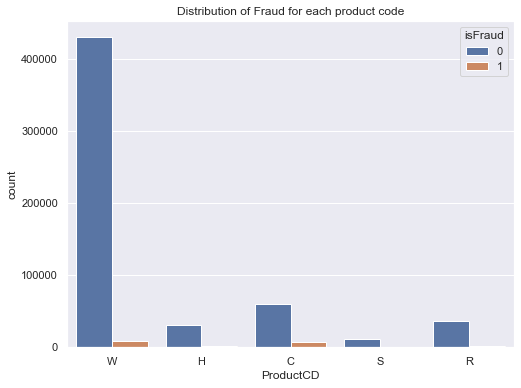

In [240]:
fig,axes=plt.subplots(figsize=(8,6))
sns.countplot(x=train['ProductCD'],hue=train['isFraud'])
axes.set_title("Distribution of Fraud for each product code")

####  Compute the % of Fradulent transactions in each product category 

In [241]:

for cd in train['ProductCD'].unique():
    print("% of Fradulent when product code is {} is : {}".format(cd,(train[train['ProductCD']==cd]['isFraud'].value_counts()[1])/(len(train[train['ProductCD']==cd]))*100))
   


% of Fradulent when product code is W is : 2.0399483246449592
% of Fradulent when product code is H is : 4.766230620155039
% of Fradulent when product code is C is : 11.687269224594637
% of Fradulent when product code is S is : 5.8995528035775715
% of Fradulent when product code is R is : 3.782593702750736


No handles with labels found to put in legend.


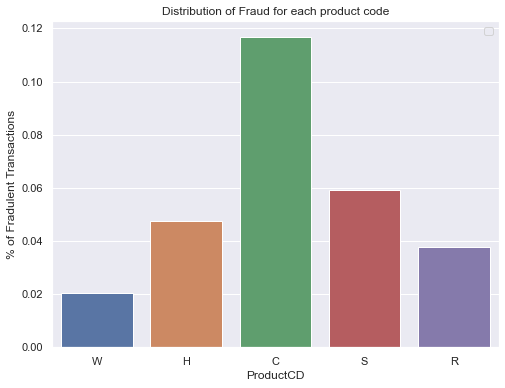

In [242]:
fig,axes=plt.subplots(figsize=(8,6))
sns.barplot(x=train['ProductCD'],y=train['isFraud'],data=train[['ProductCD','isFraud']].groupby(['ProductCD']).mean(),ci=None)
axes.set_title("Distribution of Fraud for each product code")
axes.set(ylabel='% of Fradulent Transactions')
axes.legend()

Observation: We see that the fraud transaction are high when product code is C and less when product code is W

## Analyse card related data

In [243]:
card_cols_names=[col for col in train.columns if col[0:4]=='card']
train[card_cols_names].head(6)

card1  card2  card3       card4  card5   card6
0  13926    NaN  150.0    discover  142.0  credit
1   2755  404.0  150.0  mastercard  102.0  credit
2   4663  490.0  150.0        visa  166.0   debit
3  18132  567.0  150.0  mastercard  117.0   debit
4   4497  514.0  150.0  mastercard  102.0  credit
5   5937  555.0  150.0        visa  226.0   debit

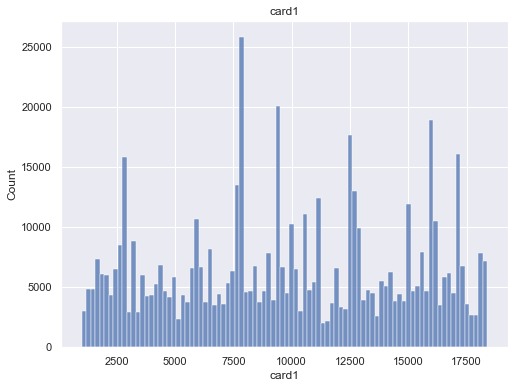

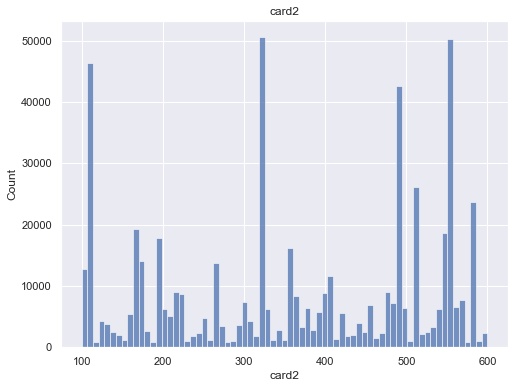

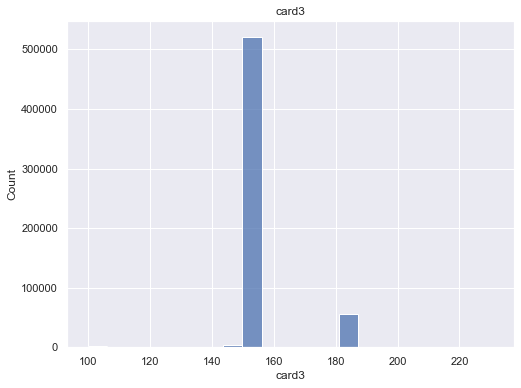

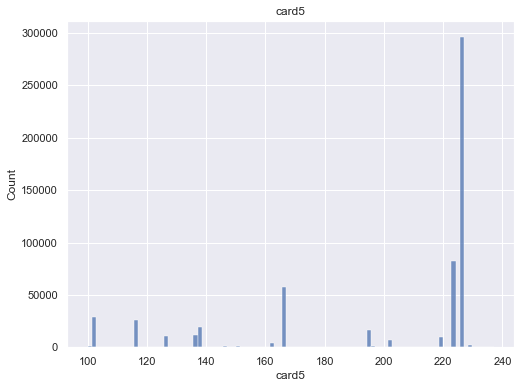

In [244]:
for cname in card_cols_names:
    if train[cname].dtypes in ['int64','float64']:
        fig, axes = plt.subplots(figsize=(8,6))
        sns.histplot(data=train[cname])
        axes.title.set_text(cname)
        plt.show()
    

## card4

No handles with labels found to put in legend.


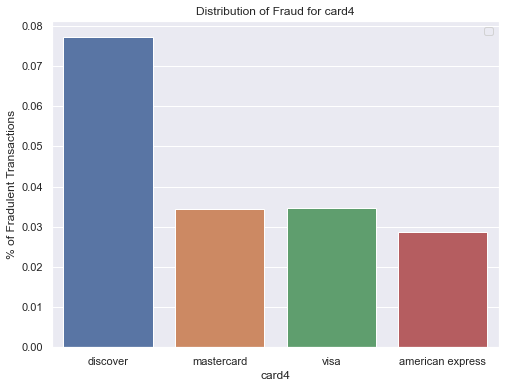

In [245]:
fig,axes=plt.subplots(figsize=(8,6))
sns.barplot(x=train['card4'],y=train['isFraud'],data=train[['card4','isFraud']].groupby(['card4']).mean(),ci=None)
axes.set_title("Distribution of Fraud for card4")
axes.set(ylabel='% of Fradulent Transactions')
axes.legend()

### Observation: Discover card has high fradulent rate compared to other types of card 

## card6

No handles with labels found to put in legend.


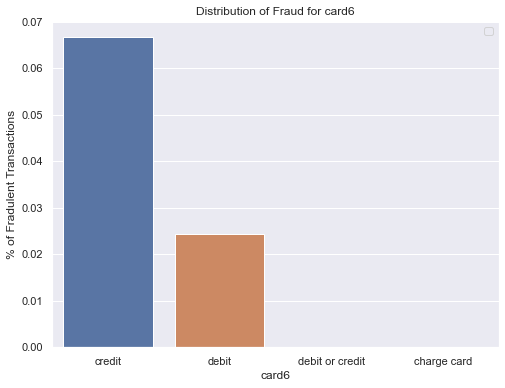

In [246]:
fig,axes=plt.subplots(figsize=(8,6))
sns.barplot(x=train['card6'],y=train['isFraud'],data=train[['card6','isFraud']].groupby(['card6']).mean(),ci=None)
axes.set_title("Distribution of Fraud for card6")
axes.set(ylabel='% of Fradulent Transactions')
axes.legend()

### Observation: Fradulent % is high for credit compared to debit 

In [247]:
#Corelation of card columns vs target variable
train[card_cols_names+['isFraud']].corr()


card1     card2     card3     card5   isFraud
card1    1.000000  0.004956  0.002966 -0.093624 -0.013639
card2    0.004956  1.000000  0.023817  0.030494  0.003389
card3    0.002966  0.023817  1.000000 -0.158387  0.154151
card5   -0.093624  0.030494 -0.158387  1.000000 -0.033581
isFraud -0.013639  0.003389  0.154151 -0.033581  1.000000

# Analysis on email Domain

/Users/harikolguri/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


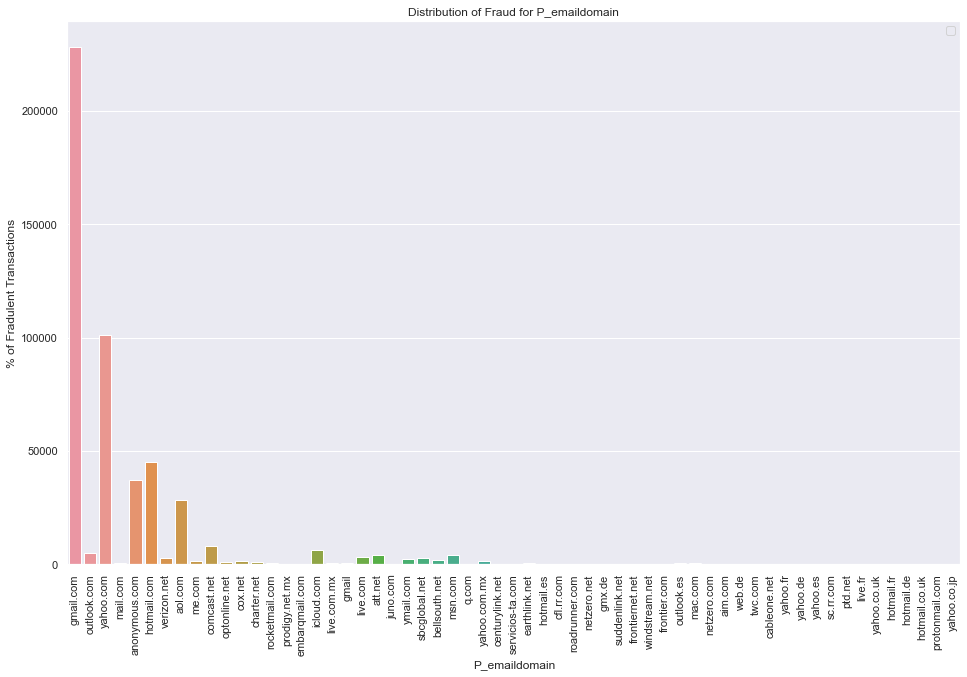

In [248]:
fig,axes=plt.subplots(figsize=(16,10))
sns.countplot(train['P_emaildomain'])
axes.set_title("Distribution of Fraud for P_emaildomain")
axes.set(ylabel='% of Fradulent Transactions')
axes.set_xticklabels(axes.get_xticklabels(),rotation=90)
axes.legend()

### Observtion: we see lot of transactions have purchaser email domain of gmail

No handles with labels found to put in legend.


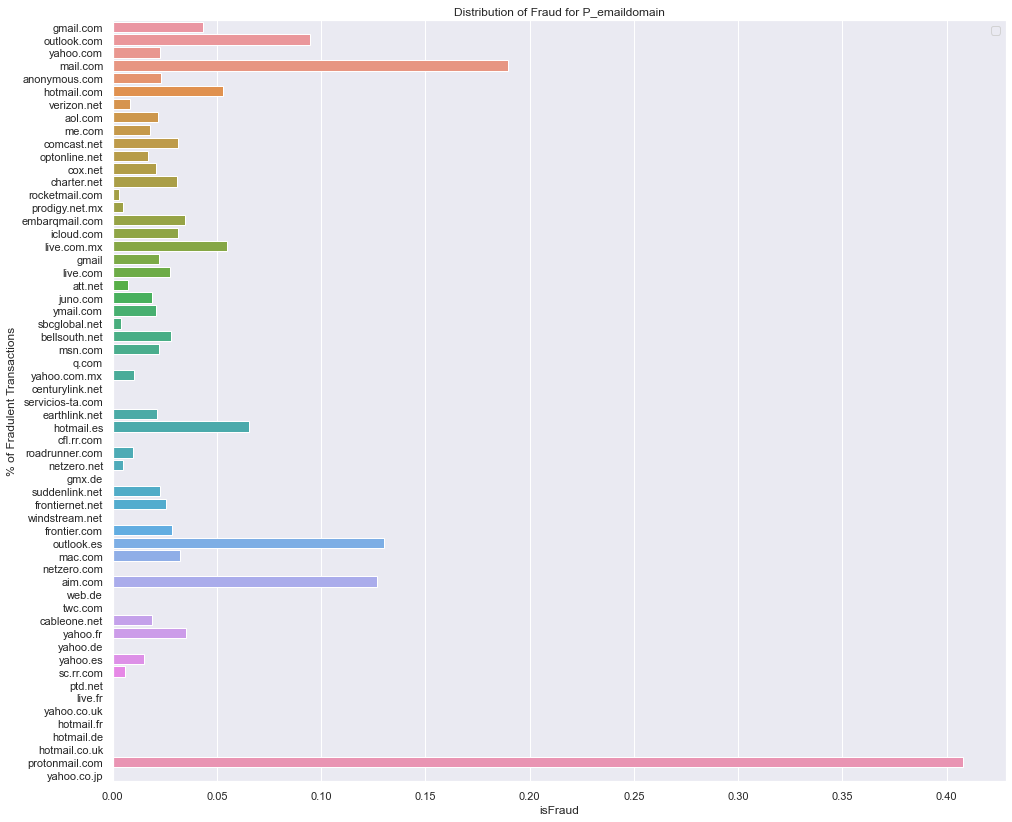

In [249]:
fig,axes=plt.subplots(figsize=(16,14))
sns.barplot(y=train['P_emaildomain'],x=train['isFraud'],data=train[['P_emaildomain','isFraud']].groupby(['P_emaildomain']).mean(),ci=None)
axes.set_title("Distribution of Fraud for P_emaildomain")
axes.set(ylabel='% of Fradulent Transactions')
axes.legend()

### Observation: we see out of all pruchaser email domains, lot of fradulent activity happens from protonmail domain, around 40%

/Users/harikolguri/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


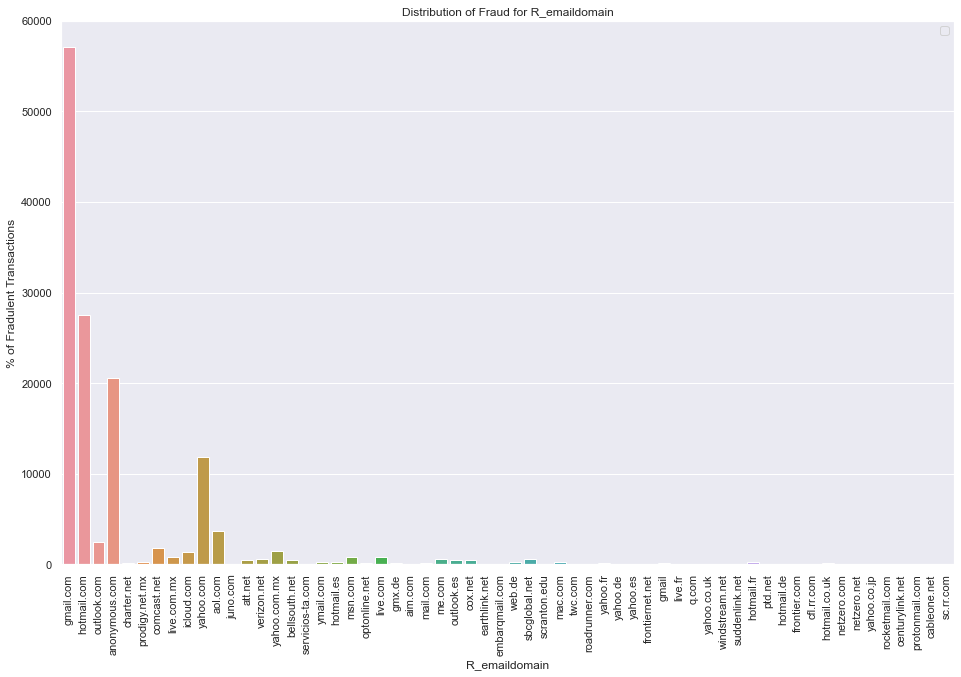

In [250]:
fig,axes=plt.subplots(figsize=(16,10))
sns.countplot(train['R_emaildomain'])
axes.set_title("Distribution of Fraud for R_emaildomain")
axes.set(ylabel='% of Fradulent Transactions')
axes.set_xticklabels(axes.get_xticklabels(),rotation=90)
axes.legend()

### Observtion: we see lot of transactions have purchaser email domain of gmail

No handles with labels found to put in legend.


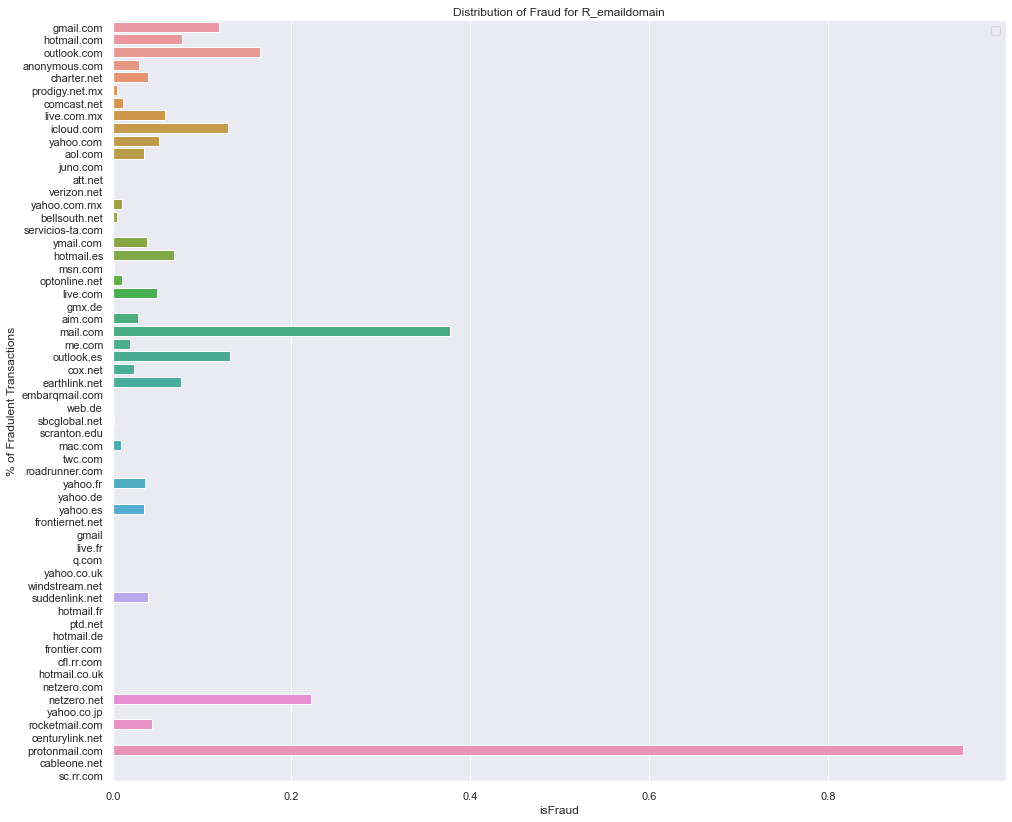

In [251]:
fig,axes=plt.subplots(figsize=(16,14))
sns.barplot(y=train['R_emaildomain'],x=train['isFraud'],data=train[['R_emaildomain','isFraud']].groupby(['R_emaildomain']).mean(),ci=None)
axes.set_title("Distribution of Fraud for R_emaildomain")
axes.set(ylabel='% of Fradulent Transactions')
axes.legend()

### Observation: we see out of all pruchaser email domains, lot of fradulent activity happens from protonmail domain, around 90% +

## Analysis on Device Type

In [252]:
train['DeviceType'].unique()

array(['mobile', 'desktop', nan], dtype=object)

/Users/harikolguri/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DeviceType', ylabel='count'>

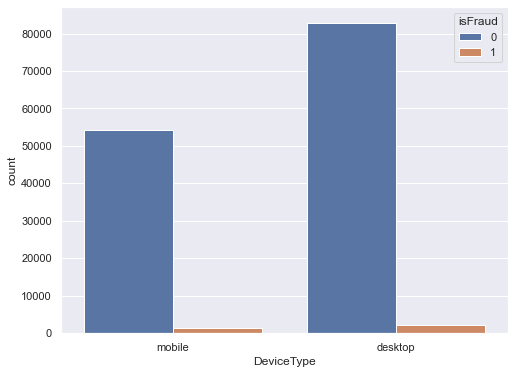

In [253]:
fig,axes=plt.subplots(figsize=(8,6))
sns.countplot(train['DeviceType'],hue=train['isFraud'])

### Observation: we see the traffic form desktop is higher than the traffic from mobile .

No handles with labels found to put in legend.


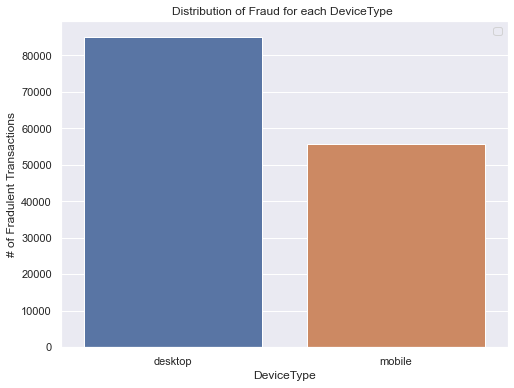

In [254]:
fig,axes=plt.subplots(figsize=(8,6))
sns.barplot(x='DeviceType',y='isFraud',data=train[['DeviceType','isFraud']].groupby(['DeviceType'],as_index=False).count())
axes.set_title("Distribution of Fraud for each DeviceType ")
axes.set(ylabel='# of Fradulent Transactions')
axes.legend()

### Observation: We  observe that the Fraud activity is almost evently distributed between mobile and desktop traffic

<AxesSubplot:xlabel='DeviceType', ylabel='isFraud'>

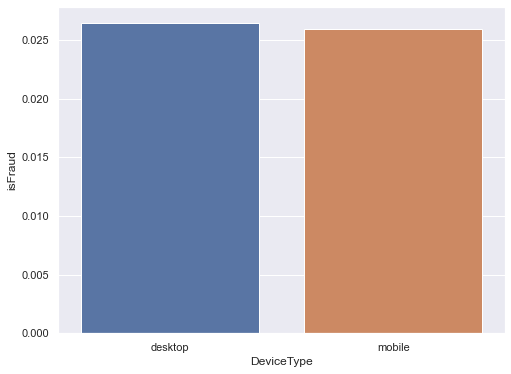

In [255]:

fig,axes=plt.subplots(figsize=(8,6))
sns.barplot(x='DeviceType',y='isFraud',data=train[['DeviceType','isFraud']].groupby(['DeviceType'],as_index=False).mean())


## Analyse Device Info

In [256]:
#Filter Device Info and Traget variable and take mean after goruping by Device Info
train_deviceinfo = train[['DeviceInfo','isFraud']].groupby(by=['DeviceInfo']).mean().sort_values(by='isFraud',ascending=False)


<AxesSubplot:title={'center':'Fradulent rate based on Device on which transaction was placed'}, xlabel='DeviceInfo', ylabel='% Fraud'>

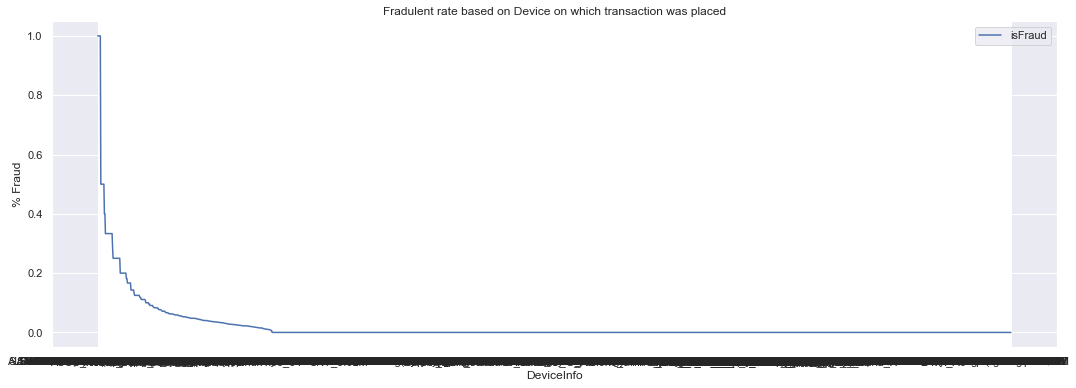

In [257]:
fig,axes=plt.subplots(figsize=(18,6))
axes.set_title("Fradulent rate based on Device on which transaction was placed")
axes.set_ylabel("% Fraud")
sns.lineplot(data=train_deviceinfo)

### Observation: we see for certain device types fradulet rate is very high compared to others . Lets try to zoom into these device types

In [258]:
train_deviceinfo[train_deviceinfo['isFraud']>0.8]

isFraud
DeviceInfo                           
SM-T587P                          1.0
SM-A300H                          1.0
SM-T355Y Build/NMF26X             1.0
SAMSUNG SM-T800 Build/MMB29K      1.0
iris702                           1.0
LGMS395                           1.0

### Observation: We see there are 6 devices which have a 100% of fradulent rate

In [259]:
train_M_cols=[col for col in train.columns if col[0:1]=='M']

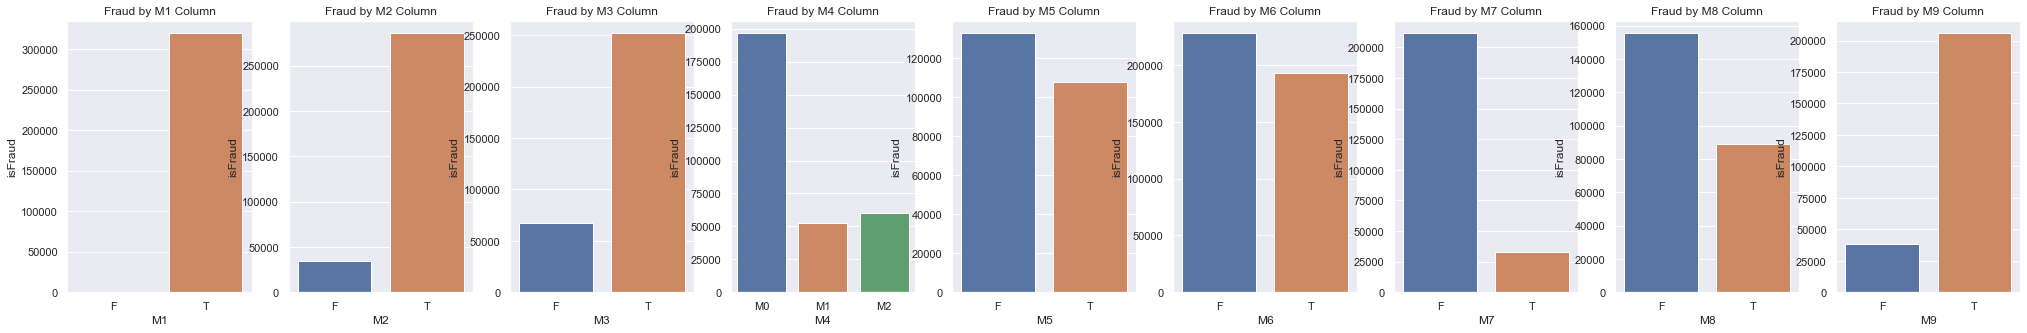

In [260]:
fig,axes=plt.subplots(1,9,figsize=(35,5))
sns.set(font_scale=1)
for i,col in enumerate(train_M_cols):
    axes[i].title.set_text("Fraud by "+ col+" Column")
    train_m_grp=train[[col,'isFraud']].groupby([col]).count()
    sns.barplot(x=train_m_grp.index,y='isFraud',data=train_m_grp,ax=axes[i])

### Observation: For M1 M2 M3 M9 we see fradulent activity is more for T category. For M5 M6 M7 M8 we see fradulent activity is more for 'F' category. We also observe M4 has subcategory as M0 M1 and M2

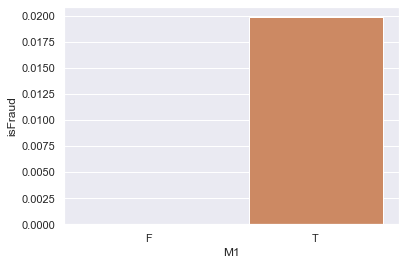

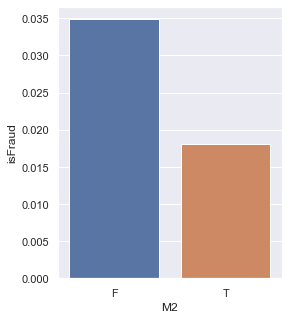

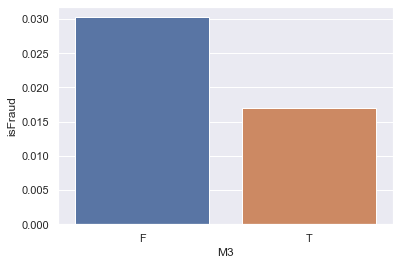

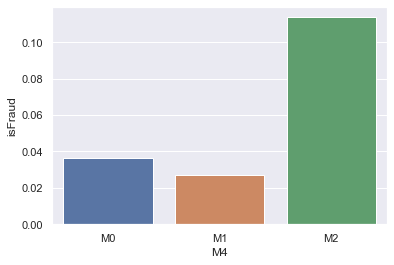

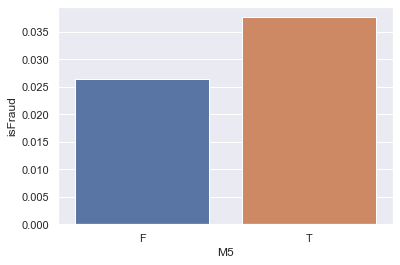

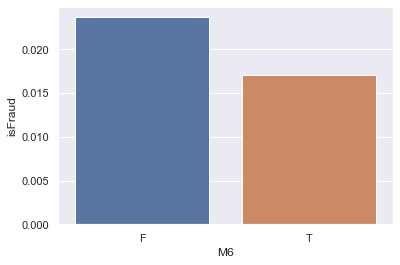

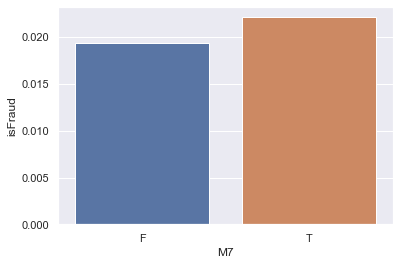

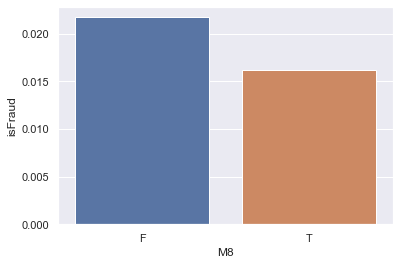

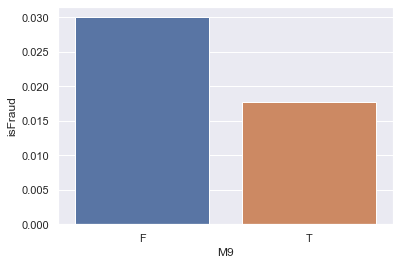

In [261]:
fig,axes=plt.subplots(figsize=(4,5))
sns.set(font_scale=1)
for i,col in enumerate(train_M_cols):
    plt.figure(i)
    train_m_grp=train[[col,'isFraud']].groupby([col]).mean()
    sns.barplot(x=train_m_grp.index,y='isFraud',data=train_m_grp)

### Observation For M1 column, 'T' category has 2% of Fradulent transactions , for M2 'F' has 3.5% fradulent transactions , for M3 'F' category has 3% fradulent transaction etc..

## Anayse D columns

All the D columns seem to be related to some time delta . 

In [262]:
train_d_cols=[col for col in train.columns if col[0:1]=='D' and len(col)<4]

In [ ]:
train[train_d_cols].head()

/Users/harikolguri/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


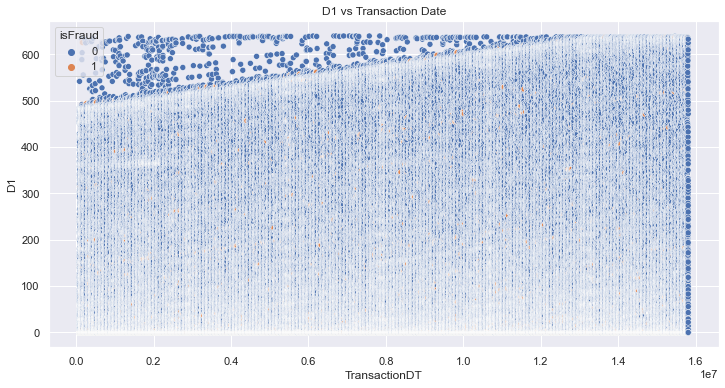

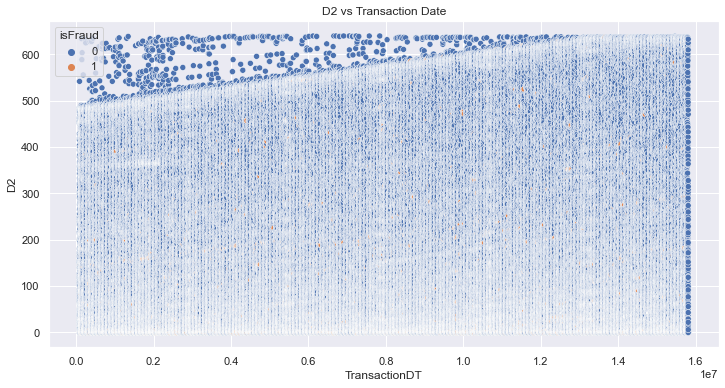

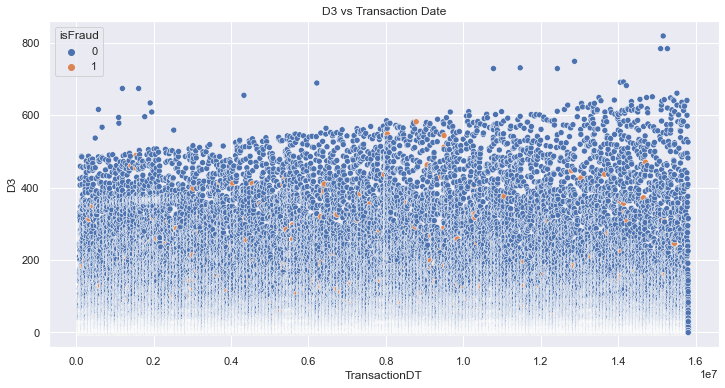

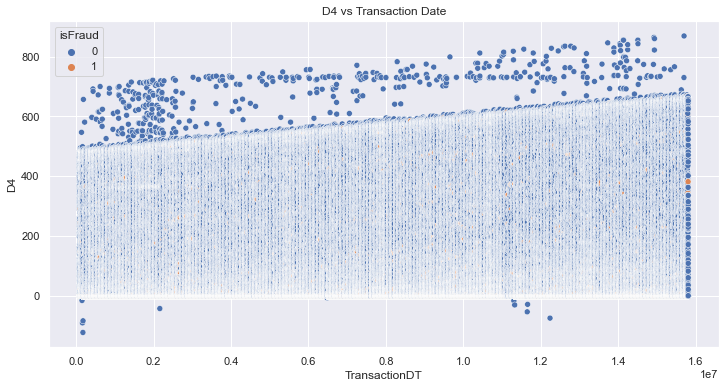

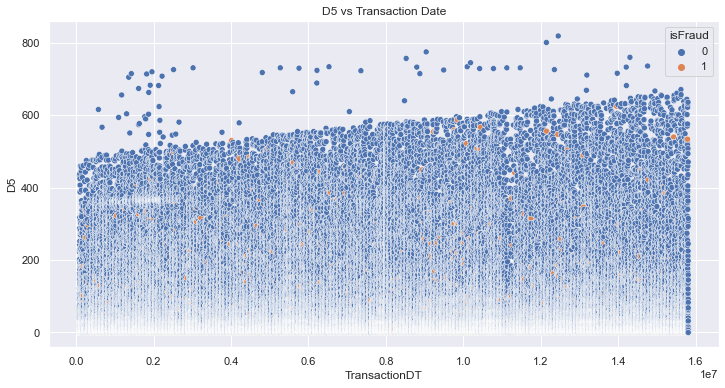

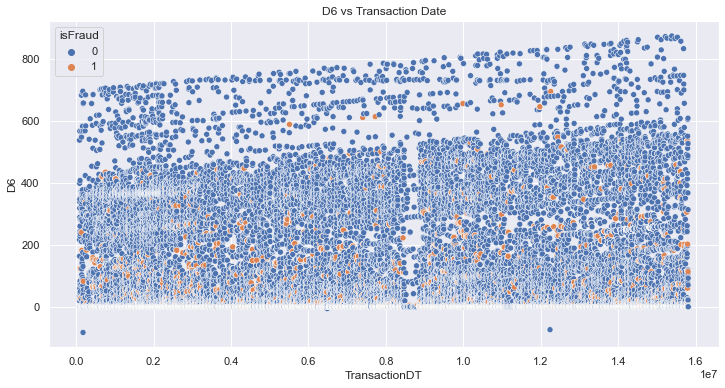

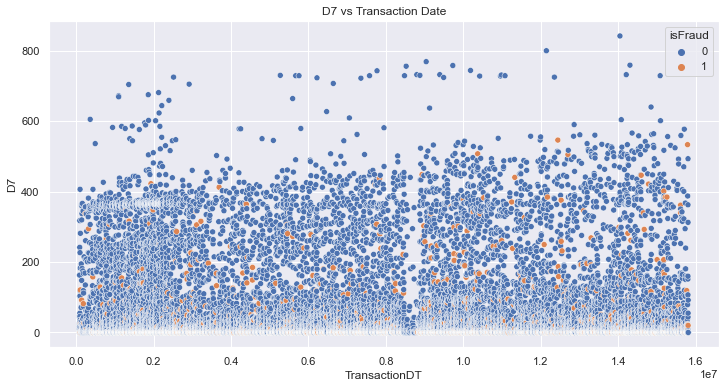

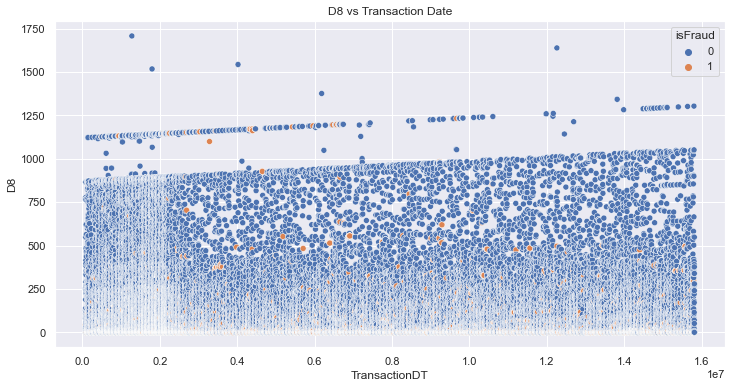

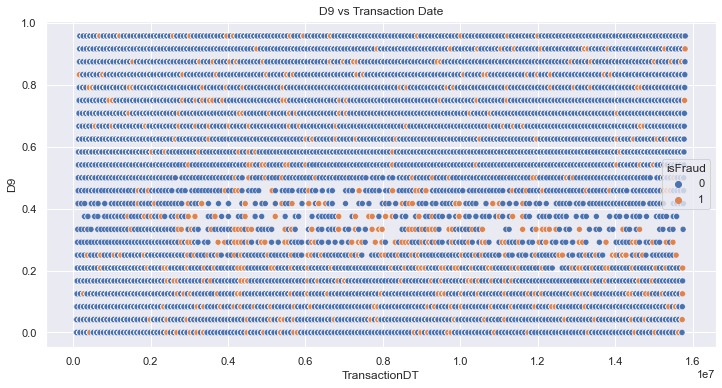

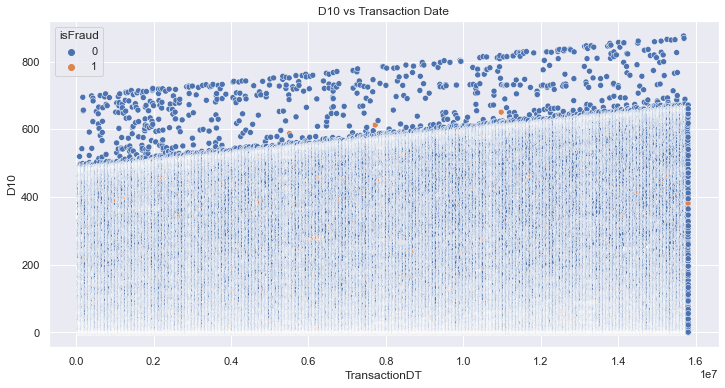

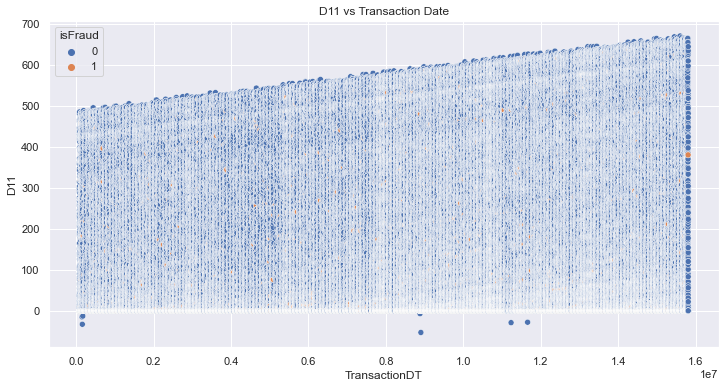

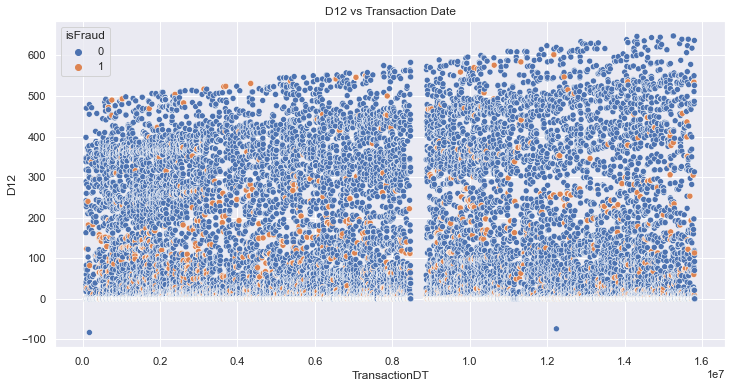

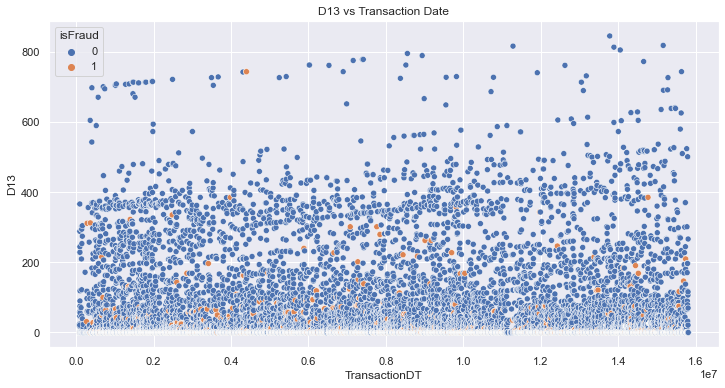

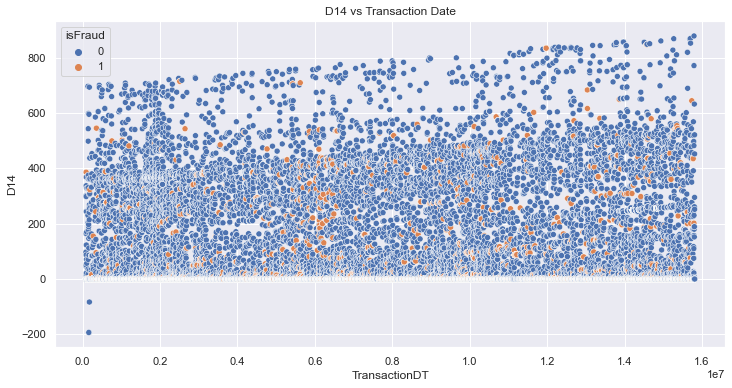

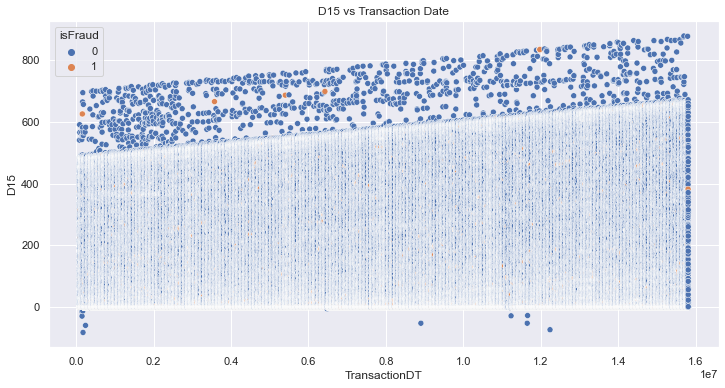

In [267]:
for col in train_d_cols:
    plt.figure(figsize=(12,6))
    sns.scatterplot(x=train['TransactionDT'],y=train[col],hue=train['isFraud'])
    plt.title(f'{col} vs Transaction Date')
    plt.show()

### Observation: D features are time delta features. D1 is days since a particular credit card began. 

### Rename the column names in test data frame to match the train column names

In [268]:
#Grab Id columns form train data set
tr_id_cols=[col for col in test.columns if col[0:2]=='id']

#Grab Id columns form test data set
tst_id_cols=[col for col in train.columns if col[0:2]=='id']

#create a dictionaary with test column name as key and tain col name as value
id_dict=dict(zip(tr_id_cols,tst_id_cols))

# we see the column headings in test data for id comumns is id- . lets change it to id_ to match the train column headings
test.rename(columns=id_dict,inplace=True)


In [269]:
#Clean infinity values and replace with nan

def clean_inf_replace_with_nan(df_t):
    return df_t.replace([np.inf,-np.inf],np.nan)

train=clean_inf_replace_with_nan(train)
test=clean_inf_replace_with_nan(test)

In [270]:
train.fillna(0,inplace=True)
test.fillna(0,inplace=True)

### Label Encode all catogerical column names

In [271]:

for col in train.columns:
    if train[col].dtype=='object':
        le=LabelEncoder()
        le.fit(list(train[col].astype(str).values)+list(test[col].astype(str).values))
        train[col]=le.transform(list(train[col].astype(str).values))
        test[col]=le.transform(list(test[col].astype(str).values))


In [272]:
X_train=train.drop('isFraud',axis=1).copy()
y_train=train['isFraud'].copy()
X_test=test.copy()

### Train Test split

In [273]:


X_train_s,X_test_s,y_train_s,y_test_s=train_test_split(X_train,y_train,test_size=0.3,stratify=y_train,random_state=1)



### Fit Random Forest Model

In [274]:


model = RandomForestClassifier()
model.fit(X_train_s,y_train_s)
y_test_pred = model.predict(X_test_s)

#predict_proba gives probability that the observation belongs to each of the 2 classes. It returns a 2 dim array
test_fpr, test_tpr, thresholds = roc_curve(y_test_s, model.predict_proba(X_test_s)[:,1])

#Area under ROC curve
print('Area under test roc {}'.format(auc(test_fpr, test_tpr)))


Area under test roc 0.9254796730035113


In [275]:
X_test_s.shape

(177162, 446)

In [352]:
rf_basic_score=round(roc_auc_score(y_test_s,y_test_pred),5)
print("Roc Auc Score is:",rf_basic_score)

Roc Auc Score is: 0.72345


In [277]:
# create a dictionary of  feature names and feature importance scores which we can use to plot top 20 useful features  
features={}
for feat,imp in zip(X_train_s.columns,model.feature_importances_):
    features[feat]=imp
imp_df=pd.DataFrame.from_dict(features,orient="index").rename(columns={0:"Gini Importance"})
_=imp_df.sort_values(by="Gini Importance",ascending=False,inplace=True)
# feat_and_imp_df=pd.DataFrame(zip(train.columns,model.feature_importances_),columns=["Feature Name","Gini Impurity"])
# _=feat_and_imp_df.sort_values(by="Gini Impurity",ascending=False,inplace=True)


In [278]:
imp_df.head()

Gini Importance
TransactionID          0.028086
TransactionDT          0.027501
TransactionAmt         0.025220
card1                  0.024174
card2                  0.022280

No handles with labels found to put in legend.


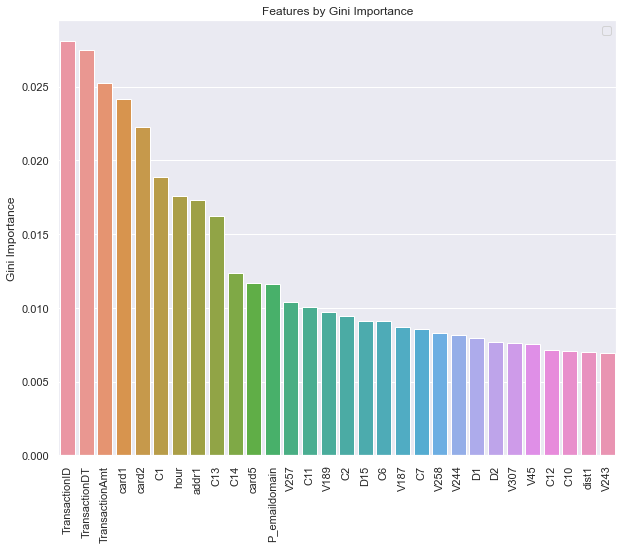

In [279]:
fig,axes=plt.subplots(figsize=(10,8))
sns.barplot(x=imp_df.index[0:30],y='Gini Importance',data=imp_df[0:30])
axes.set_title("Features by Gini Importance")
axes.set_xticklabels(axes.get_xticklabels(),rotation=90)
axes.legend()


In [365]:

# Define a table to store the Metrics for each model.Specify the Column Names of table as part of initialization 
scores_report = PrettyTable(["Model Name","Metric", "Percentage"])
scores_report.add_row(["RF_Basic","roc_auc_score",rf_basic_score])

### Error Analysis

In [280]:
err_analysis_dict = { 'Actuals': y_test_s, 'Predictions': y_test_pred } 
err_analysis_df = pd.DataFrame(err_analysis_dict)

In [281]:
# Grab the column names of top 30 features:
col_names_of_top_30_imp_features=imp_df[0:30].index

In [282]:
actual_and_predictions_dict = { 'Actuals': y_test_s, 'Predictions': y_test_pred } 
actual_and_predictions_df = pd.DataFrame(actual_and_predictions_dict)


In [283]:
#Lets look at the actuals and predictions that do not match .
#Transaction that have (Actual 0, predicted as 1) and (Actual 1, predicted 0)
misclassified_df=err_analysis_df[(((err_analysis_df["Actuals"]==0) & (err_analysis_df["Predictions"]==1)))|(((err_analysis_df["Actuals"]==1) & (err_analysis_df["Predictions"]==0)))]


In [284]:
misclassified_df.head()

Actuals  Predictions
68145         1            0
492765        1            0
485068        1            0
362572        1            0
439726        1            0

In [285]:
#check sample transaction that was misclassified . 
#Below transaction with iloc 1062 has an actual is Fradulent but predicted as not fradulent
X_test_s.loc[492765][col_names_of_top_30_imp_features]

TransactionID      3479765.0
TransactionDT     12858585.0
TransactionAmt          77.0
card1                 8528.0
card2                  215.0
C1                       1.0
hour                    19.0
addr1                  272.0
C13                      1.0
C14                      1.0
card5                  226.0
P_emaildomain           55.0
V257                     0.0
C11                      1.0
V189                     0.0
C2                       1.0
D15                      0.0
C6                       1.0
V187                     0.0
C7                       0.0
V258                     0.0
V244                     0.0
D1                       0.0
D2                       0.0
V307                     0.0
V45                      1.0
C12                      0.0
C10                      0.0
dist1                    0.0
V243                     0.0
Name: 492765, dtype: float64

In [286]:
#Grab transactions that were Fradulent and predicted as fradulent to compare with above transaction 
actual_and_predictions_df[(actual_and_predictions_df["Actuals"]==1) &(actual_and_predictions_df["Predictions"]==1)].head()


Actuals  Predictions
195441        1            1
372362        1            1
240311        1            1
66246         1            1
512288        1            1

In [287]:
#Check top 30 imp feture values for correctly classified transaction 
X_test_s.loc[68145][col_names_of_top_30_imp_features]

TransactionID     3055145.0
TransactionDT     1542425.0
TransactionAmt        335.0
card1                7585.0
card2                 553.0
C1                      1.0
hour                   20.0
addr1                 441.0
C13                     1.0
C14                     1.0
card5                 226.0
P_emaildomain           0.0
V257                    0.0
C11                     1.0
V189                    0.0
C2                      1.0
D15                     1.0
C6                      2.0
V187                    0.0
C7                      0.0
V258                    0.0
V244                    0.0
D1                      1.0
D2                      1.0
V307                 1021.0
V45                     0.0
C12                     0.0
C10                     0.0
dist1                 167.0
V243                    0.0
Name: 68145, dtype: float64

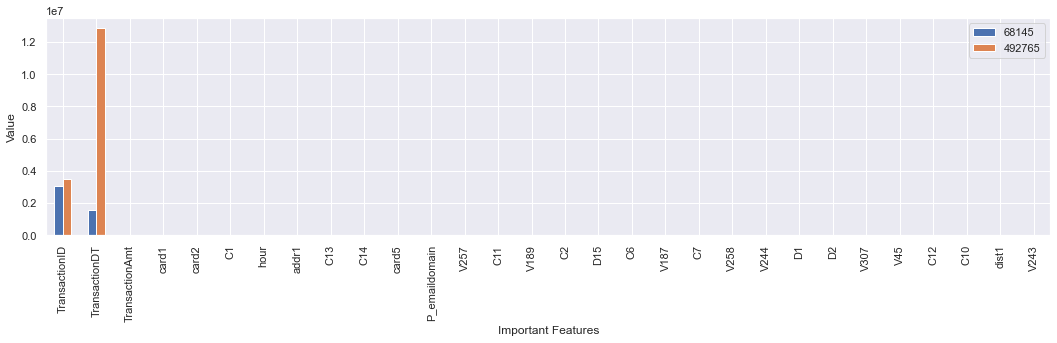

In [288]:
ax=X_test_s.loc[[68145,492765]][col_names_of_top_30_imp_features].T.plot.bar(figsize=(18,4))
ax.set_xlabel("Important Features", fontsize=12)
ax.set_ylabel("Value", fontsize=12)
plt.show()

#### Observation: we see the Transaction date for miscalssified transaction is very less compared to the correctly classified transaction. Lets drop the transactionID adn DT field adn try to zoom into other fields

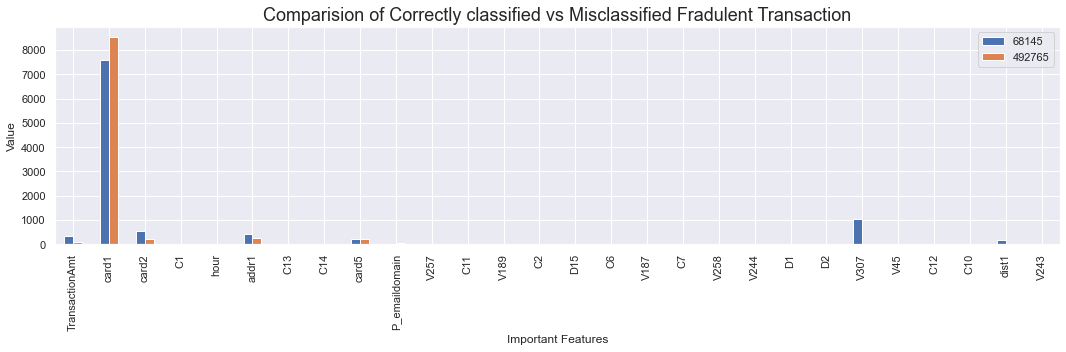

In [289]:
# plot these 2 records 
ax=X_test_s.loc[[68145,492765]][col_names_of_top_30_imp_features[2:]].T.plot.bar(figsize=(18,4))
ax.set_title("Comparision of Correctly classified vs Misclassified Fradulent Transaction", fontsize=18)
ax.set_xlabel("Important Features", fontsize=12)
ax.set_ylabel("Value", fontsize=12)
plt.show()


#### Observation: Misclassified transaction (1062) do not have values for fields addr1 and V307 where as the correctly classified transaction had data for these fields


### Hyper Paramater tuning  for Random Forest

In [290]:

clf = RandomForestClassifier(n_jobs= -1,class_weight='balanced')
no_of_estimators = [5, 10, 50, 100, 120,150,200,300,400,500,600]
maximumdepth = [1, 5, 7, 10, 15, 25, 30,35,40,45,50]
parameters = {'n_estimators': no_of_estimators ,'max_depth':maximumdepth}
model = RandomizedSearchCV(estimator=clf,  param_distributions=parameters, cv=3, n_iter=6, scoring='roc_auc')
model.fit(X_train_s,y_train_s)


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    n_jobs=-1),
                   n_iter=6,
                   param_distributions={'max_depth': [1, 5, 7, 10, 15, 25, 30,
                                                      35, 40, 45, 50],
                                        'n_estimators': [5, 10, 50, 100, 120,
                                                         150, 200, 300, 400,
                                                         500, 600]},
                   scoring='roc_auc')

In [291]:
model.best_params_

{'n_estimators': 200, 'max_depth': 40}

In [344]:
tuned_rf_model = RandomForestClassifier(n_estimators= 200,max_depth=40,max_features=30,min_samples_leaf=200)
tuned_rf_model.fit(X_train_s,y_train_s)
y_test_pred_tuned_rf = tuned_rf_model.predict(X_test_s)

#predict_proba gives probability that the observation belongs to each of the 2 classes. It returns a 2 dim array
test_fpr_rf_t, test_tpr_rf_t, thresholds_rf_t = roc_curve(y_test_s, tuned_rf_model.predict_proba(X_test_s)[:,1])

#Area under ROC curve
print('Area under test roc {}'.format(auc(test_fpr_rf_t, test_tpr_rf_t)))


Area under test roc 0.895902679951569


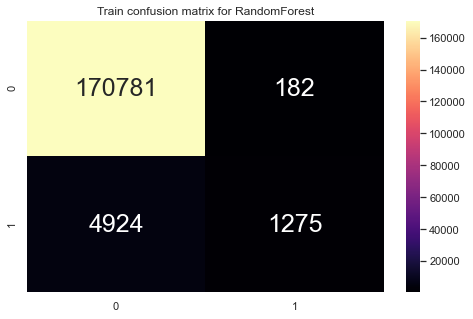

In [345]:
test_cf_matrix_rf = confusion_matrix(y_test_s,y_test_pred_tuned_rf)
plt.figure(figsize=(8,5)) 
sns.heatmap(test_cf_matrix_rf,annot=True,annot_kws={"size": 25},fmt="d",cmap="magma") #Integer formatiing
plt.title('Train confusion matrix for RandomForest')
plt.show()

In [294]:
# create a dictionary of  feature names and feature importance scores which we can use to plot top 20 useful features  
features={}
for feat,imp in zip(X_train_s.columns,tuned_rf_model.feature_importances_):
    features[feat]=imp
imp_df_t=pd.DataFrame.from_dict(features,orient="index").rename(columns={0:"Gini Importance"})
_=imp_df_t.sort_values(by="Gini Importance",ascending=False,inplace=True)
# feat_and_imp_df=pd.DataFrame(zip(train.columns,model.feature_importances_),columns=["Feature Name","Gini Impurity"])
# _=feat_and_imp_df.sort_values(by="Gini Impurity",ascending=False,inplace=True)

No handles with labels found to put in legend.


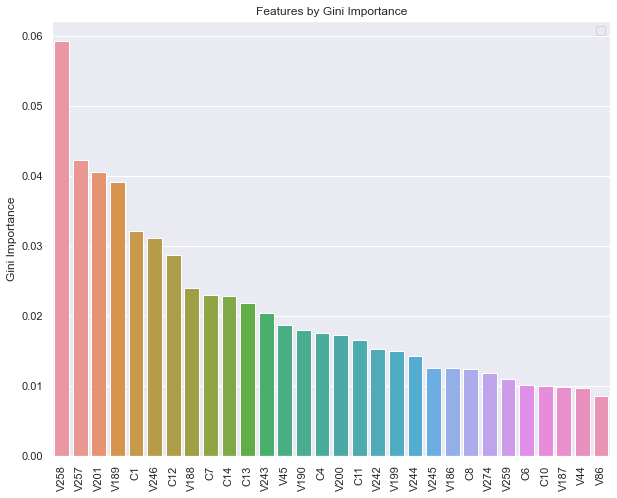

In [295]:
fig,axes=plt.subplots(figsize=(10,8))
sns.barplot(x=imp_df_t.index[0:30],y='Gini Importance',data=imp_df_t[0:30])
axes.set_title("Features by Gini Importance")
axes.set_xticklabels(axes.get_xticklabels(),rotation=90)
axes.legend()


### XGBoost Classifier

In [296]:


params = {'n_estimators':[1000,2000,3000],'max_depth':[3,6,12,15],'subsample':[0.4,0.8]}


classifier = xgb.XGBClassifier( 
        missing=-1, learning_rate=0.02,
        eval_metric='auc', tree_method='hist',colsample_bytree=0.4)


model_xgboost = RandomizedSearchCV(estimator=classifier, param_distributions=params, scoring='roc_auc', verbose=1, cv=3, n_iter=6)
model_xgboost.fit(X_train_s,y_train_s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 173.3min finished


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=0.4,
                                           eval_metric='auc', gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.02,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=-1,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           r

In [297]:
model.best_params_

{'n_estimators': 200, 'max_depth': 40}

In [298]:
model_xgboost_tuned = xgb.XGBClassifier( 
        missing=-1, learning_rate=0.02,
        #learning_rate=0.02,
        eval_metric='auc', tree_method='hist',colsample_bytree=0.4,max_depth=40,n_estimators=200,subsample=0.8)
model_xgboost_tuned.fit(X_train_s,y_train_s)
y_test_pred_xgboost = model_xgboost_tuned.predict(X_test_s)

test_fpr_xgb, test_tpr_xgb, thresholds_xgb = roc_curve(y_test_pred_xgboost, model_xgboost_tuned.predict_proba(X_test_s)[:,1])

#Area under ROC curve
print('Area under test roc {}'.format(auc(test_fpr_xgb, test_tpr_xgb)))



Area under test roc 1.0


In [299]:
print("Roc Auc Score is:",roc_auc_score(y_test_s,y_test_pred_xgboost))

Roc Auc Score is: 0.7296983108893064


In [367]:
xgboost_score=round(roc_auc_score(y_test_s,y_test_pred_xgboost),5)
print("Roc Auc Score is:",xgboost_score)
scores_report.add_row(["XGBoost","roc_auc_score",xgboost_score])

Roc Auc Score is: 0.7297


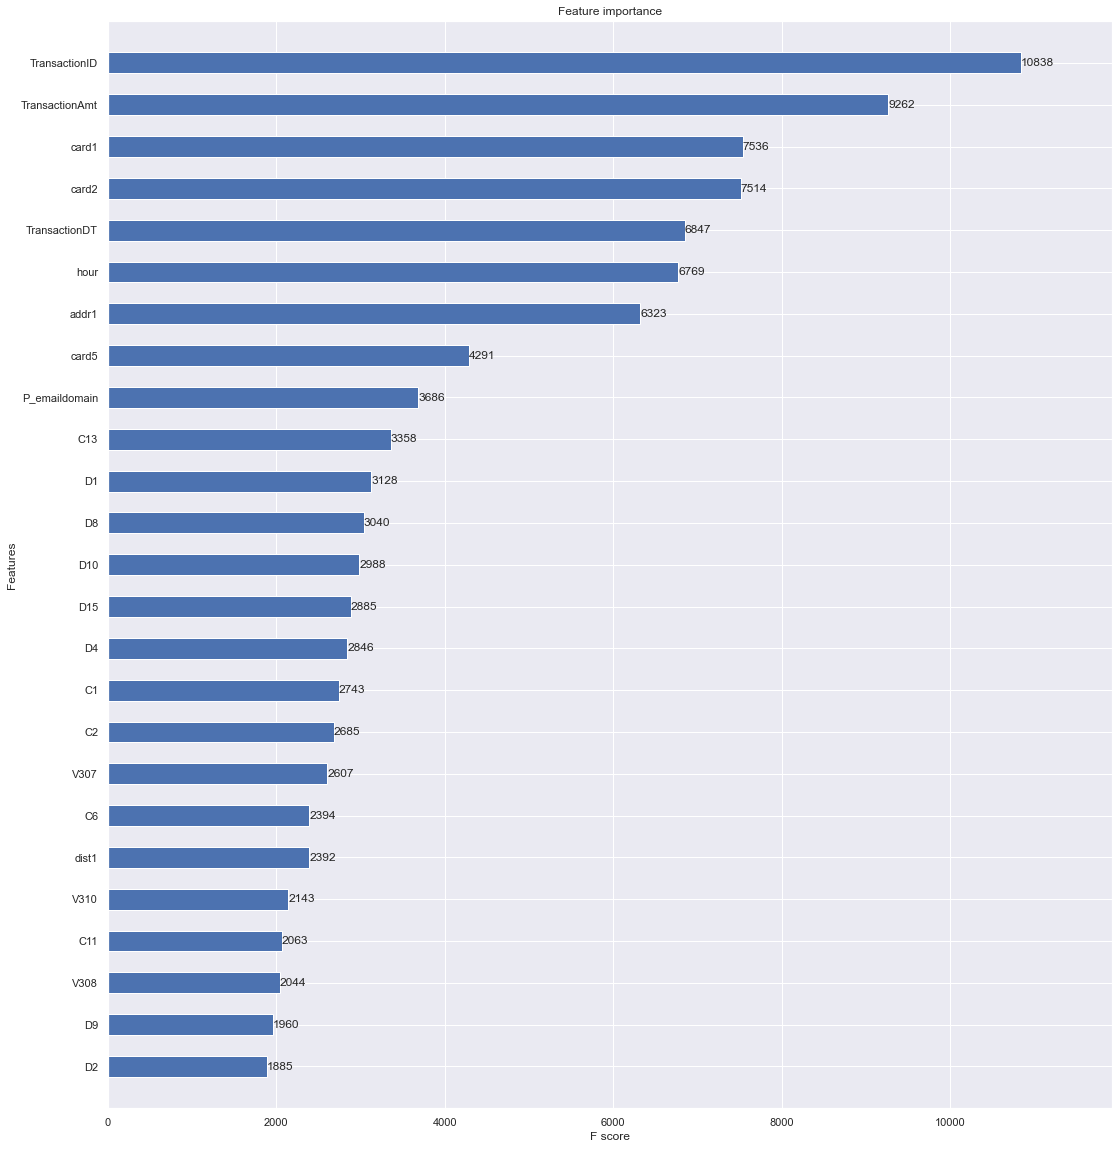

In [300]:

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(18,20))
plot_importance(model_xgboost_tuned,max_num_features=25,height=0.5,ax=axes)
plt.show()

In [301]:
# !brew install graphviz

In [302]:
# from xgboost import plot_tree 
# plot_tree(model_xgboost_tuned, fmap='', num_trees=0, rankdir=None, ax=None)

In [303]:

confusion_matrix(y_test_s,y_test_pred_xgboost)

array([[170792,    171],
       [  3345,   2854]])

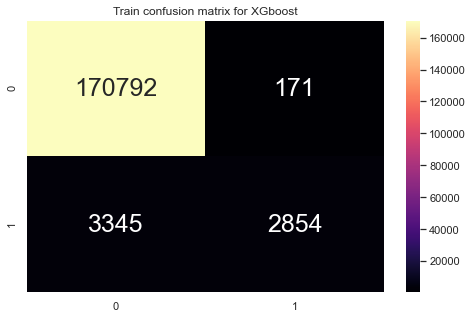

In [304]:
test_cf_matrix = confusion_matrix(y_test_s,y_test_pred_xgboost)
plt.figure(figsize=(8,5)) 
sns.heatmap(test_cf_matrix,annot=True,annot_kws={"size": 25},fmt="d",cmap="magma") #Integer formatiing
plt.title('Train confusion matrix for XGboost')
plt.show()

### LightGBM

In [332]:
from sklearn.model_selection import TimeSeriesSplit,KFold
fold_count=5

folds=TimeSeriesSplit(n_splits=fold_count)
folds=KFold(n_splits=5)

In [334]:
print(X_train.shape)
print(y_train.shape)
print(X_test_s.shape)


(590538, 446)
(590538,)
(177162, 446)


In [335]:
#conda install lightgbm

In [336]:
cols_lgb=X_train.columns
splits=folds.split(X_train,y_train)

y_preds_lgb=np.zeros(X_test_s.shape[0])
y_oof_xbg=np.zeros(X_train.shape[0])

score_auc_xgb=0

feats_imp_xgb=pd.DataFrame()

feats_imp_xgb["feature"]=cols_lgb

In [337]:
params={
    "num_leaves" : 64,
    "min_child_weight" : 0.03,
    "feature_fraction" : 0.04,
    "bagging_fraction" : 0.33,
    "min_data_in_leaf" :80,
    "objective" : "binary",
    "max_depth" : -1,
    "learning_rate": 0.006,
    "boosting_type" : "gbdt",
    "bagging_seed" : 7,
    "metric":"auc",
    "verbosity" : -1,
    "reg_alpha" : 0.3,
    "reg_lambda": 0.6,
    "random_state": 0,   
}

In [339]:
%%time
for fold_n,(train_index, valid_index) in enumerate(splits):
    X_tr,X_val=X_train[cols_lgb].iloc[train_index],X_train[cols_lgb].iloc[valid_index]
    y_tr,y_val=y_train.iloc[train_index],y_train.iloc[valid_index]
    
    dtrain=lgb.Dataset(X_tr,label=y_tr)
    dvalid=lgb.Dataset(X_val,label=y_val)
    
    clf=lgb.train(params,dtrain,1000,valid_sets=[dtrain],verbose_eval=200,early_stopping_rounds=100)
    
    feats_imp_xgb[f'fold_{fold_n +1}'] = clf.feature_importance()
    
    y_pred_val=clf.predict(X_val)
    y_oof_xbg[valid_index]= y_pred_val
    print(f"Fold {fold_n +1} | AUC: {roc_auc_score(y_val,y_pred_val)}")
    
    score_auc_xgb += roc_auc_score(y_val,y_pred_val)/fold_count
    
    y_preds_lgb += clf.predict(X_test_s)/fold_count
    
    del X_tr, X_val, y_tr,y_val
    

Training until validation scores don't improve for 100 rounds
[200]	training's auc: 0.872095
[400]	training's auc: 0.882815
[600]	training's auc: 0.892824
[800]	training's auc: 0.900418
[1000]	training's auc: 0.906563
Did not meet early stopping. Best iteration is:
[1000]	training's auc: 0.906563
Fold 1 | AUC: 0.8665417033977287
Training until validation scores don't improve for 100 rounds
[200]	training's auc: 0.872424
[400]	training's auc: 0.883452
[600]	training's auc: 0.893407
[800]	training's auc: 0.900921
[1000]	training's auc: 0.906946
Did not meet early stopping. Best iteration is:
[1000]	training's auc: 0.906946
Fold 2 | AUC: 0.8899254038477643
Training until validation scores don't improve for 100 rounds
[200]	training's auc: 0.873562
[400]	training's auc: 0.884873
[600]	training's auc: 0.89481
[800]	training's auc: 0.902506
[1000]	training's auc: 0.908731
Did not meet early stopping. Best iteration is:
[1000]	training's auc: 0.908731
Fold 3 | AUC: 0.8818009172635535
Training

In [340]:
print(f"\nMean AUC={score_auc_xgb}")
print(f"Out of folds AUC = {roc_auc_score(y_train,y_oof_xbg)}")


Mean AUC=0.8808332658198398
Out of folds AUC = 0.8814068095793983


In [368]:
Light_GBM_score=round(roc_auc_score(y_train,y_oof_xbg),5)
print("Roc Auc Score is:",Light_GBM_score)
scores_report.add_row(["Light_GBM","roc_auc_score",Light_GBM_score])

Roc Auc Score is: 0.88141


In [341]:

feats_imp_xgb["average"]=feats_imp_xgb[["fold_{}".format(fold +1) for fold in range(folds.n_splits)]].mean(axis=1)



In [342]:
feats_top_20_xgb=feats_imp_xgb[["feature","average"]].sort_values(by="average",ascending=False).head(20)

No handles with labels found to put in legend.


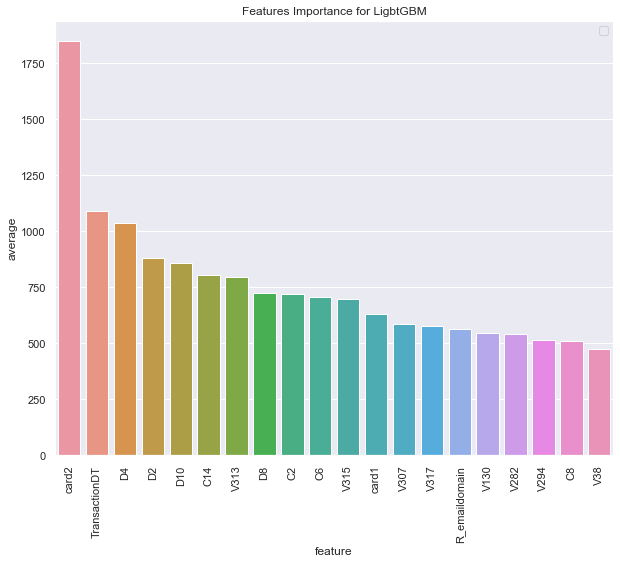

In [343]:

fig,axes=plt.subplots(figsize=(10,8))
sns.barplot(x='feature',y='average',data=feats_top_20_xgb)
axes.set_title("Features Importance for LigbtGBM")
axes.set_xticklabels(axes.get_xticklabels(),rotation=90)
axes.legend()


In [346]:
#pip install prettytable

Note: you may need to restart the kernel to use updated packages.


In [369]:
#Print final report of the scores for each model
  
print(scores_report)

+------------+---------------+------------+
| Model Name |     Metric    | Percentage |
+------------+---------------+------------+
|  RF_Basic  | roc_auc_score |  0.72345   |
|  XGBoost   | roc_auc_score |   0.7297   |
| Light_GBM  | roc_auc_score |  0.88141   |
+------------+---------------+------------+
